In [16]:
import pandas as pd
import numpy as np
import json
import os
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

plt.rc('figure', dpi=150)

SMALL_SIZE=17
MEDIUM_SIZE=17
BIGGER_SIZE=17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE+5)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
EXPERIMENTS_PATH = '../logs/experiments/'
experiment_files = [e for e in os.listdir(EXPERIMENTS_PATH) if 'experiment' in e]
experiments = []
for experiment in experiment_files:
    with open(f'{EXPERIMENTS_PATH}/{experiment}', 'rb') as f:
        try:
            _json = eval(json.load(f))
            _json['name'] = experiment
            if experiment != experiment:
                print(_json)
            experiments.append(_json)
        except Exception as e:
            print(f'Problem loading file {experiment}')
            print(e)
            
experiments = pd.DataFrame(experiments)
experiments['datetime'] = experiments['name'].apply(lambda x: datetime.fromtimestamp(int(x.split('_')[1].split('.')[0])))
time_of_interest = datetime(2019, 6, 25, 0)
experiments = experiments.loc[experiments['datetime'] >= time_of_interest]
experiments = experiments.set_index('datetime')
columns_to_mean = ['loss', 'precision_positives', 'precision_negatives', 'recall_positives', 'recall_negatives']
for col in columns_to_mean:
    experiments[f'{col}_last_epoch'] = experiments[col].apply(lambda x: np.nan if isinstance(x, float) else x[-1])
    experiments[f'val_{col}_last_epoch'] = experiments[f'val_{col}'].apply(lambda x: np.nan if isinstance(x, float) else x[-1])
    
spaces = pd.DataFrame(experiments['space'].tolist(), index=experiments.index)
experiments = experiments.join(spaces)
experiments['class_weight'] = experiments['class_weight'].apply(lambda x: x[1])
experiments['n_layers'] = experiments['convolutional_layers'].apply(len)
experiments['dropout'] = experiments['convolutional_layers'].apply(lambda x: x[0]['dropout'] if x else np.nan)
experiments['filters_first_layer'] = experiments['convolutional_layers'].apply(lambda x: x[0]['filters'] if x else np.nan)
experiments['n_filters'] = experiments['convolutional_layers'].apply(lambda x: sum(layer['filters'] for layer in x))
experiments['activation'] = experiments['convolutional_layers'].apply(lambda x: x[0]['activation'] if x else np.nan)
if 'log' in experiments:
    experiments = experiments.loc[experiments['log'].isnull()]
experiments = experiments.loc[experiments['model'] == "<class 'damage.models.cnn.CNN'>"]
metrics = [m for m in experiments if 'last_epoch' in m]
experiments = experiments.loc[experiments['features'] == 'aleppo_negatives_back.p']
print(experiments.shape)
experiments.head()

Problem loading file experiment_1562335723.json
name 'ResourceExhaustedError' is not defined
Problem loading file experiment_1561594366.json
name 'ResourceExhaustedError' is not defined
Problem loading file experiment_1561859894.json
name 'ResourceExhaustedError' is not defined
Problem loading file experiment_1562058375.json
name 'ResourceExhaustedError' is not defined
Problem loading file experiment_1561837393.json
name 'ResourceExhaustedError' is not defined
Problem loading file experiment_1562055279.json
name 'ResourceExhaustedError' is not defined
Problem loading file experiment_1561791914.json
name 'ResourceExhaustedError' is not defined
Problem loading file experiment_1561964608.json
name 'ResourceExhaustedError' is not defined
Problem loading file experiment_1562333758.json
name 'ResourceExhaustedError' is not defined
Problem loading file experiment_1562029091.json
name 'ResourceExhaustedError' is not defined
Problem loading file experiment_1562080855.json
name 'ResourceExhauste

,accuracy,false_negatives,false_positives,features,log,loss,model,name,negatives,num_batches_test,...,convolutional_layers,dense_units,epochs,layer_type,learning_rate,n_layers,dropout,filters_first_layer,n_filters,activation
datetime,,,,,,,,,,,,,,,,,,,,,
2019-07-11 17:05:58,"[0.76879364, 0.78043646, 0.79337585, 0.7979815...","[4.7617774, 4.7328205, 4.4314117, 4.7869306, 4...","[5.8737144, 5.3671017, 5.0732994, 4.505921, 4....",aleppo_negatives_back.p,NaN,"[0.43201211216031415, 0.21965539204097742, 0.2...",<class 'damage.models.cnn.CNN'>,experiment_1562857558.json,"[35.384647, 35.384647, 35.384647, 35.384647, 3...",357,...,"[{'filters': 16, 'dropout': 0.5666666666666667...",32,11,cnn,0.014563,3,0.566667,16,112,relu
2019-07-10 20:48:16,"[0.77135795, 0.784297, 0.799581, 0.7886056, 0....","[5.1853585, 4.637231, 4.978983, 4.708672, 4.59...","[5.5600495, 5.500088, 4.4400387, 5.2261567, 4....",aleppo_negatives_back.p,NaN,"[0.42069499841500546, 0.21702956446161248, 0.2...",<class 'damage.models.cnn.CNN'>,experiment_1562784496.json,"[36.15127, 36.15127, 36.15127, 36.15127, 36.15...",357,...,"[{'filters': 32, 'pool_size': [8, 8], 'activat...",32,9,cnn,0.029471,2,0.800000,32,96,relu
2019-07-07 21:14:00,"[0.75074315, 0.78146434, 0.7892682, 0.8012868,...","[4.152822, 5.173481, 5.001556, 5.024894, 4.604...","[7.3129916, 4.87916, 4.692108, 4.1159134, 4.18...",aleppo_negatives_back.p,NaN,"[0.5966617917305004, 0.22501450349370733, 0.21...",<class 'damage.models.cnn.CNN'>,experiment_1562526840.json,"[35.384647, 35.384647, 35.384647, 35.384647, 3...",357,...,"[{'filters': 128, 'dropout': 0.722222222222222...",16,10,vgg,0.002683,2,0.722222,128,384,relu
2019-07-08 05:52:19,"[0.777835, 0.7758263, 0.7692309, 0.7692309, 0....","[5.2942424, 7.521106, 10.845372, 10.845372, 10...","[5.146768, 3.0143058, 0.0, 0.0, 0.0, 0.0]",aleppo_negatives_back.p,NaN,"[0.33965982142262213, 0.2552720260079107, 0.27...",<class 'damage.models.cnn.CNN'>,experiment_1562557939.json,"[36.15127, 36.15127, 36.15127, 36.15127, 36.15...",357,...,"[{'filters': 16, 'pool_size': [2, 2], 'activat...",16,6,vgg,0.039069,6,0.255556,16,1008,relu
2019-07-09 08:25:19,"[0.74779093, 0.75746167, 0.76944214, 0.7692316...","[4.6153708, 5.0873175, 10.661465, 11.0766735, ...","[7.4904385, 6.5543027, 0.40510553, 0.0, 0.0, 0...",aleppo_negatives_back.p,NaN,"[0.5162277551109665, 0.3576243956088739, 0.272...",<class 'damage.models.cnn.CNN'>,experiment_1562653519.json,"[36.922424, 36.922424, 36.922424, 36.922424, 3...",357,...,"[{'filters': 32, 'activation': 'relu', 'pool_s...",32,7,vgg,0.568987,5,0.100000,32,992,relu


In [4]:
experiments_high_recall = experiments.loc[experiments['val_recall_positives_last_epoch'] >= 0.4]
experiments_high_recall_highest_precision = experiments_high_recall.loc[
    experiments_high_recall['val_precision_positives_last_epoch'].idxmax()
]
print(experiments_high_recall_highest_precision['name'])
print(experiments_high_recall_highest_precision[metrics])
print(experiments_high_recall_highest_precision['space'])

experiment_1562879686.json
loss_last_epoch                       0.183447
val_loss_last_epoch                   0.216109
precision_positives_last_epoch        0.645397
val_precision_positives_last_epoch    0.208241
precision_negatives_last_epoch        0.893032
val_precision_negatives_last_epoch    0.990215
recall_positives_last_epoch           0.640247
val_recall_positives_last_epoch       0.434096
recall_negatives_last_epoch           0.891287
val_recall_negatives_last_epoch       0.943657
Name: 2019-07-11 23:14:46, dtype: object
{'epochs': 13, 'class_weight': {0: 0.345, 1: 0.655}, 'convolutional_layers': [{'filters': 64, 'dropout': 0.6444444444444445, 'pool_size': [8, 8], 'activation': 'relu', 'kernel_size': [9, 9]}, {'filters': 128, 'dropout': 0.6444444444444445, 'pool_size': [8, 8], 'activation': 'relu', 'kernel_size': [9, 9]}, {'filters': 256, 'dropout': 0.6444444444444445, 'pool_size': [8, 8], 'activation': 'relu', 'kernel_size': [9, 9]}], 'learning_rate': 0.025595479226995357, 

In [5]:
best_performing_precision_metrics = experiments.loc[experiments['val_precision_positives_last_epoch'].idxmax(), metrics]
print(best_performing_precision_metrics)
best_performing_precision_space = experiments.loc[experiments['val_precision_positives_last_epoch'].idxmax(), 'space']
best_performing_precision_space

loss_last_epoch                       0.196287
val_loss_last_epoch                   0.155685
precision_positives_last_epoch        0.624294
val_precision_positives_last_epoch    0.322803
precision_negatives_last_epoch         0.87983
val_precision_negatives_last_epoch    0.987237
recall_positives_last_epoch           0.591565
val_recall_positives_last_epoch         0.2351
recall_negatives_last_epoch           0.889412
val_recall_negatives_last_epoch       0.981681
Name: 2019-07-10 20:48:16, dtype: object


{'learning_rate': 0.029470517025518096,
 'dense_units': 32,
 'batch_size': 47,
 'convolutional_layers': [{'filters': 32,
   'pool_size': [8, 8],
   'activation': 'relu',
   'dropout': 0.8,
   'kernel_size': [9, 9]},
  {'filters': 64,
   'pool_size': [8, 8],
   'activation': 'relu',
   'dropout': 0.8,
   'kernel_size': [9, 9]}],
 'class_weight': {0: 0.345, 1: 0.655},
 'layer_type': 'cnn',
 'epochs': 9}

In [6]:
best_performing_recall_metrics = experiments.loc[experiments['val_precision_negatives_last_epoch'].idxmax(), metrics]
print(best_performing_recall_metrics)
best_performing_recall_space = experiments.loc[experiments['val_precision_negatives_last_epoch'].idxmax(), 'space']
best_performing_recall_space

loss_last_epoch                        0.202616
val_loss_last_epoch                     2.05163
precision_positives_last_epoch         0.574137
val_precision_positives_last_epoch    0.0237702
precision_negatives_last_epoch         0.870354
val_precision_negatives_last_epoch     0.997933
recall_positives_last_epoch            0.551516
val_recall_positives_last_epoch        0.973467
recall_negatives_last_epoch             0.88235
val_recall_negatives_last_epoch        0.310958
Name: 2019-07-08 03:24:44, dtype: object


{'epochs': 9,
 'class_weight': {0: 0.345, 1: 0.655},
 'convolutional_layers': [{'filters': 32,
   'dropout': 0.17777777777777778,
   'pool_size': [2, 2],
   'activation': 'relu',
   'kernel_size': [3, 3]},
  {'filters': 64,
   'dropout': 0.17777777777777778,
   'pool_size': [2, 2],
   'activation': 'relu',
   'kernel_size': [3, 3]},
  {'filters': 128,
   'dropout': 0.17777777777777778,
   'pool_size': [2, 2],
   'activation': 'relu',
   'kernel_size': [3, 3]},
  {'filters': 256,
   'dropout': 0.17777777777777778,
   'pool_size': [2, 2],
   'activation': 'relu',
   'kernel_size': [3, 3]},
  {'filters': 512,
   'dropout': 0.17777777777777778,
   'pool_size': [2, 2],
   'activation': 'relu',
   'kernel_size': [3, 3]}],
 'learning_rate': 0.18420699693267165,
 'batch_size': 46,
 'dense_units': 64,
 'layer_type': 'cnn'}

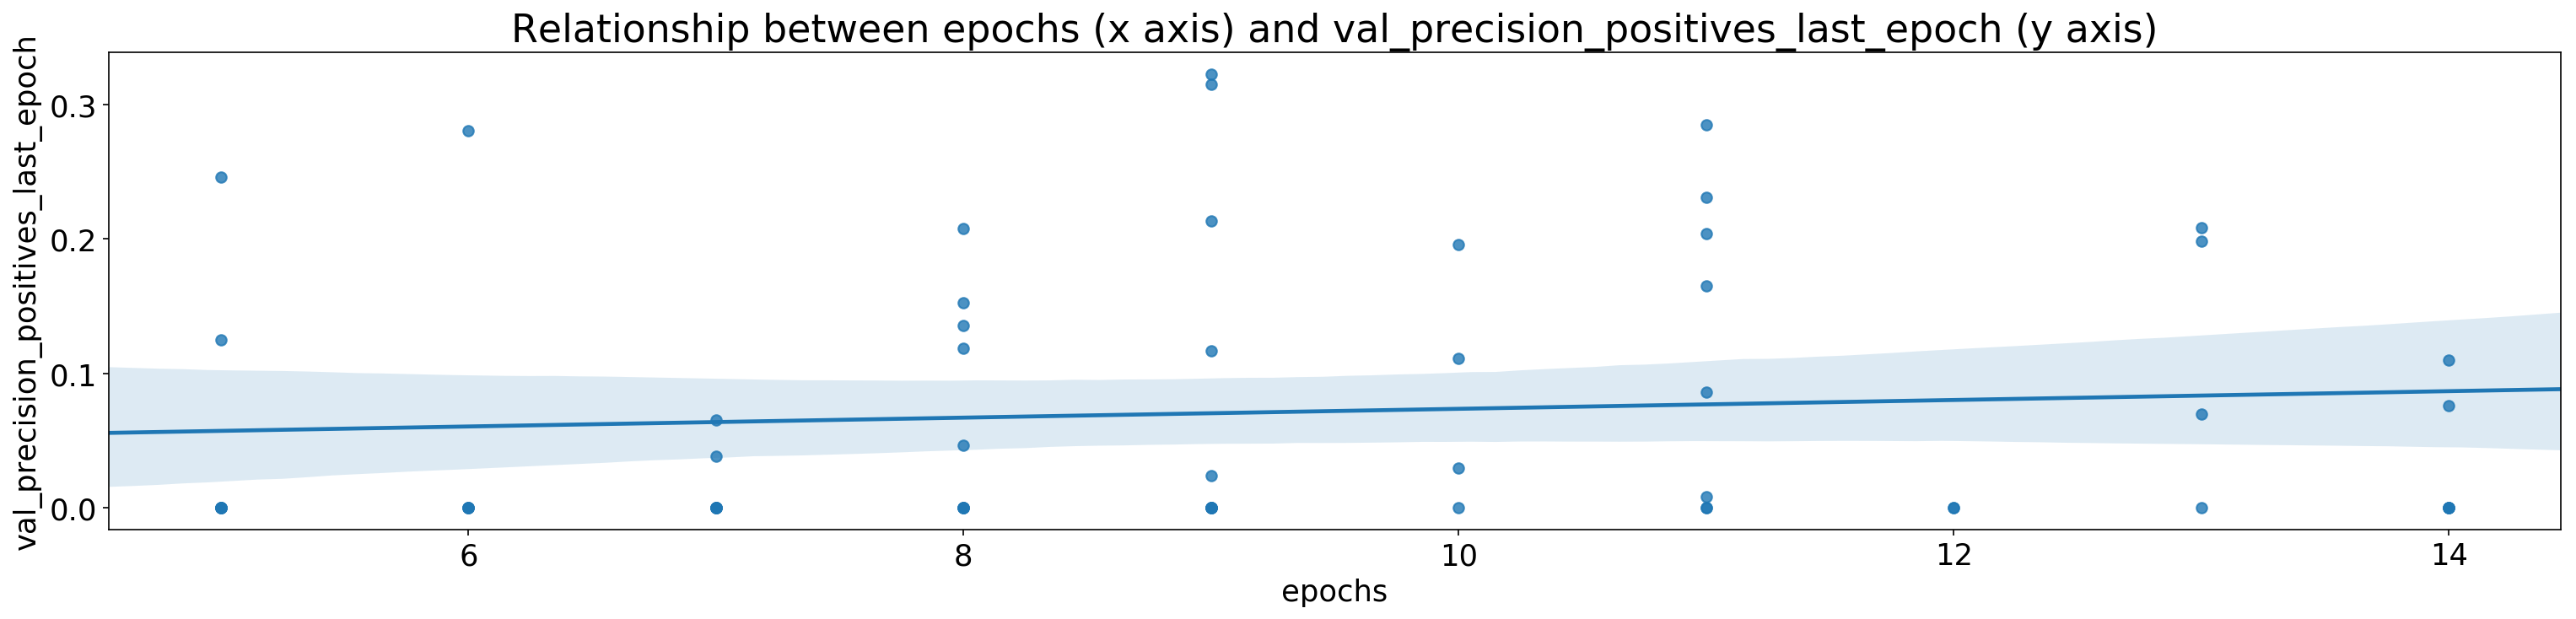

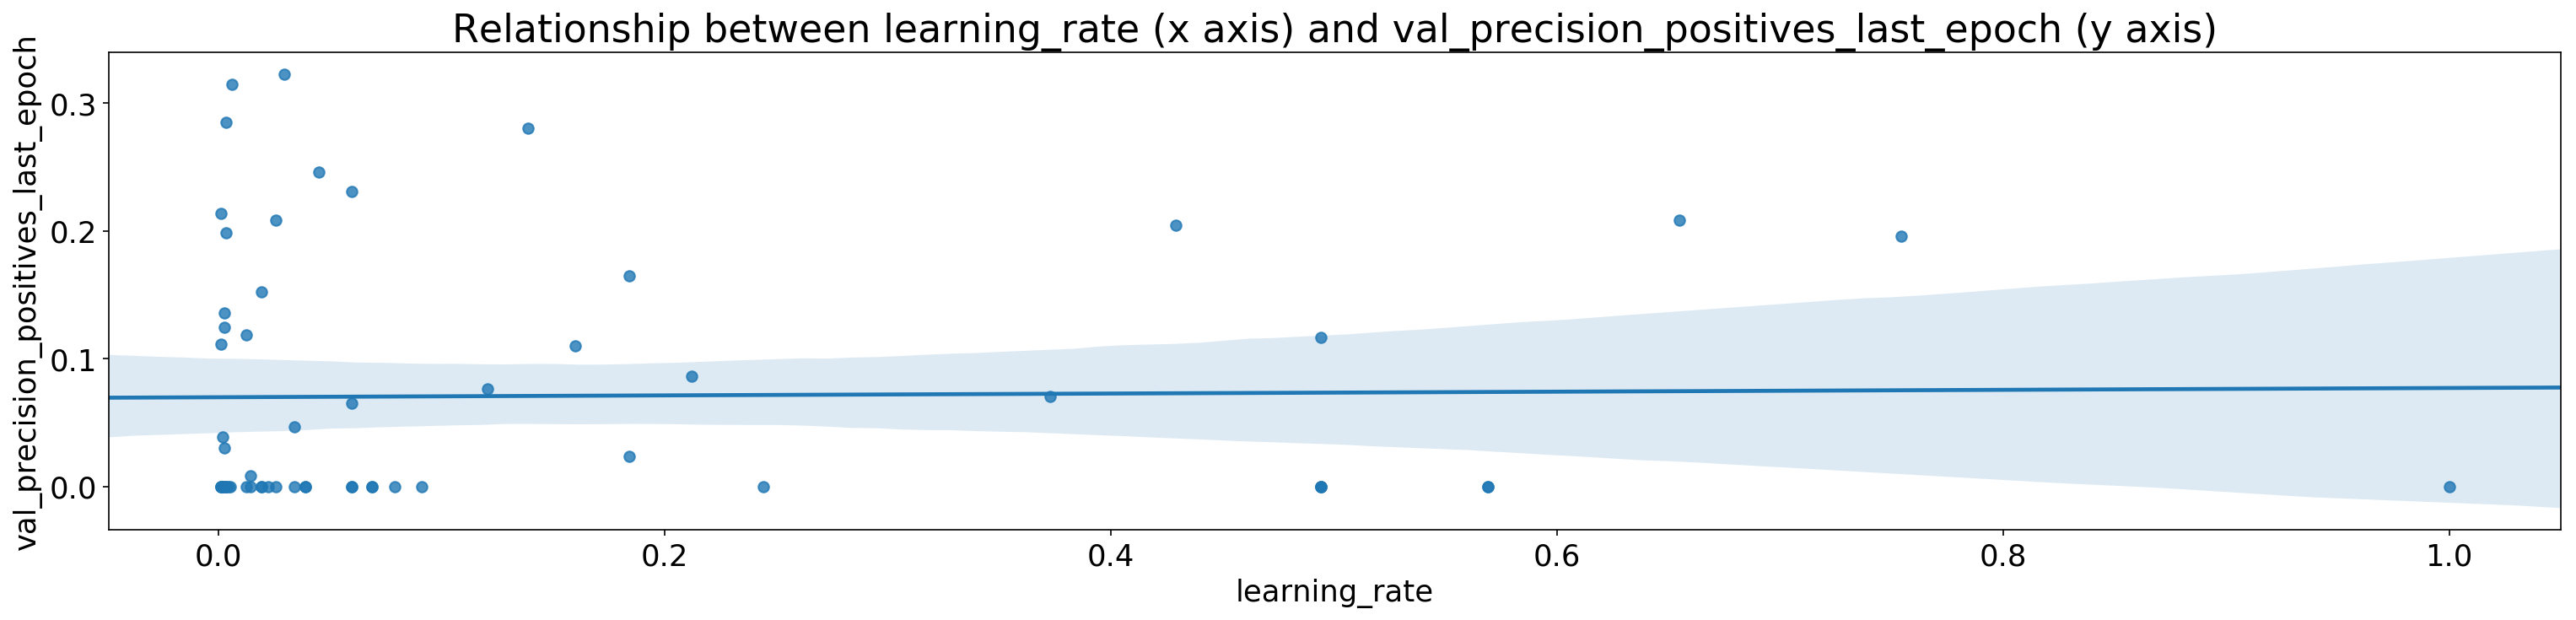

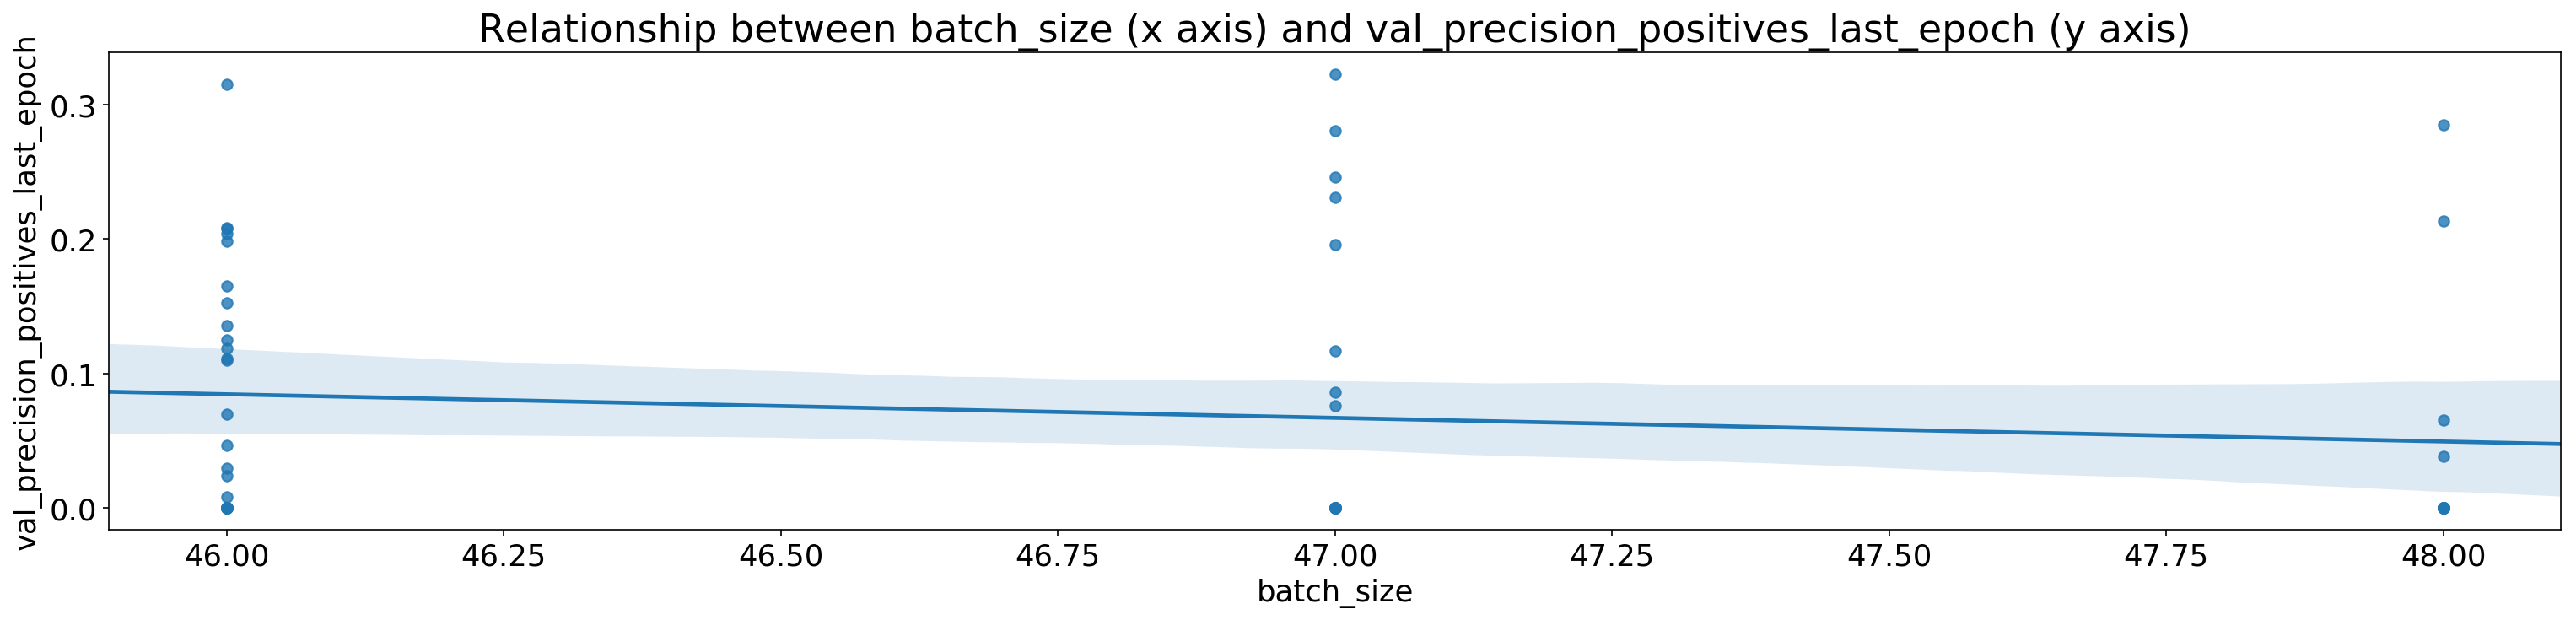

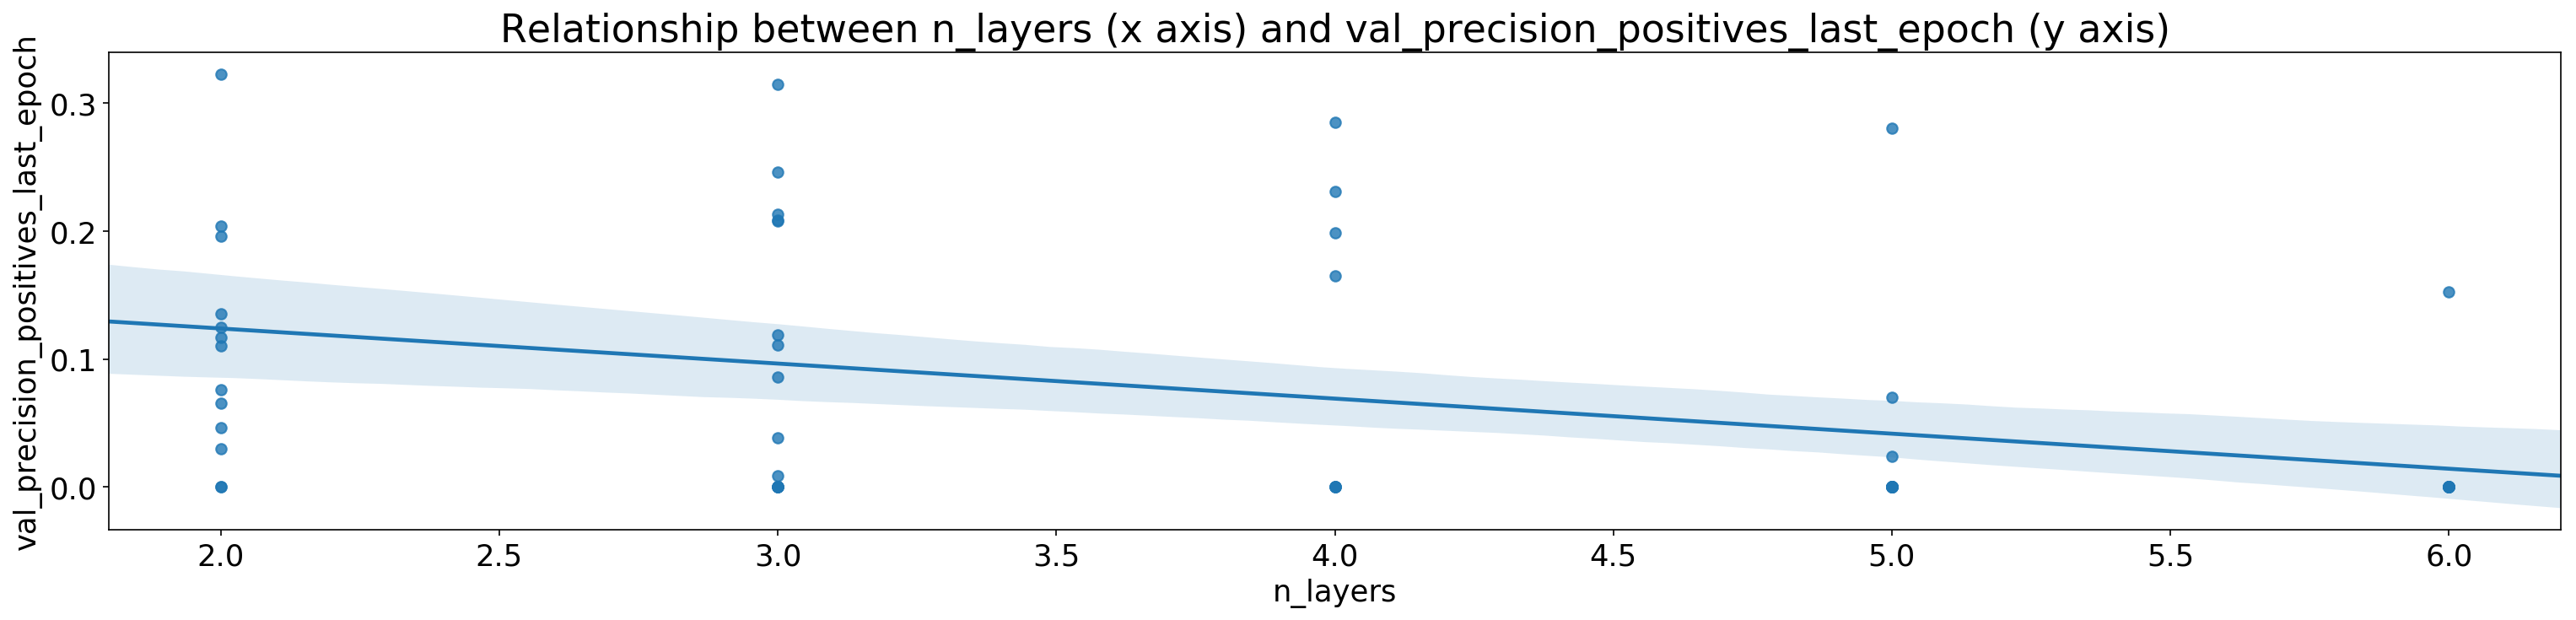

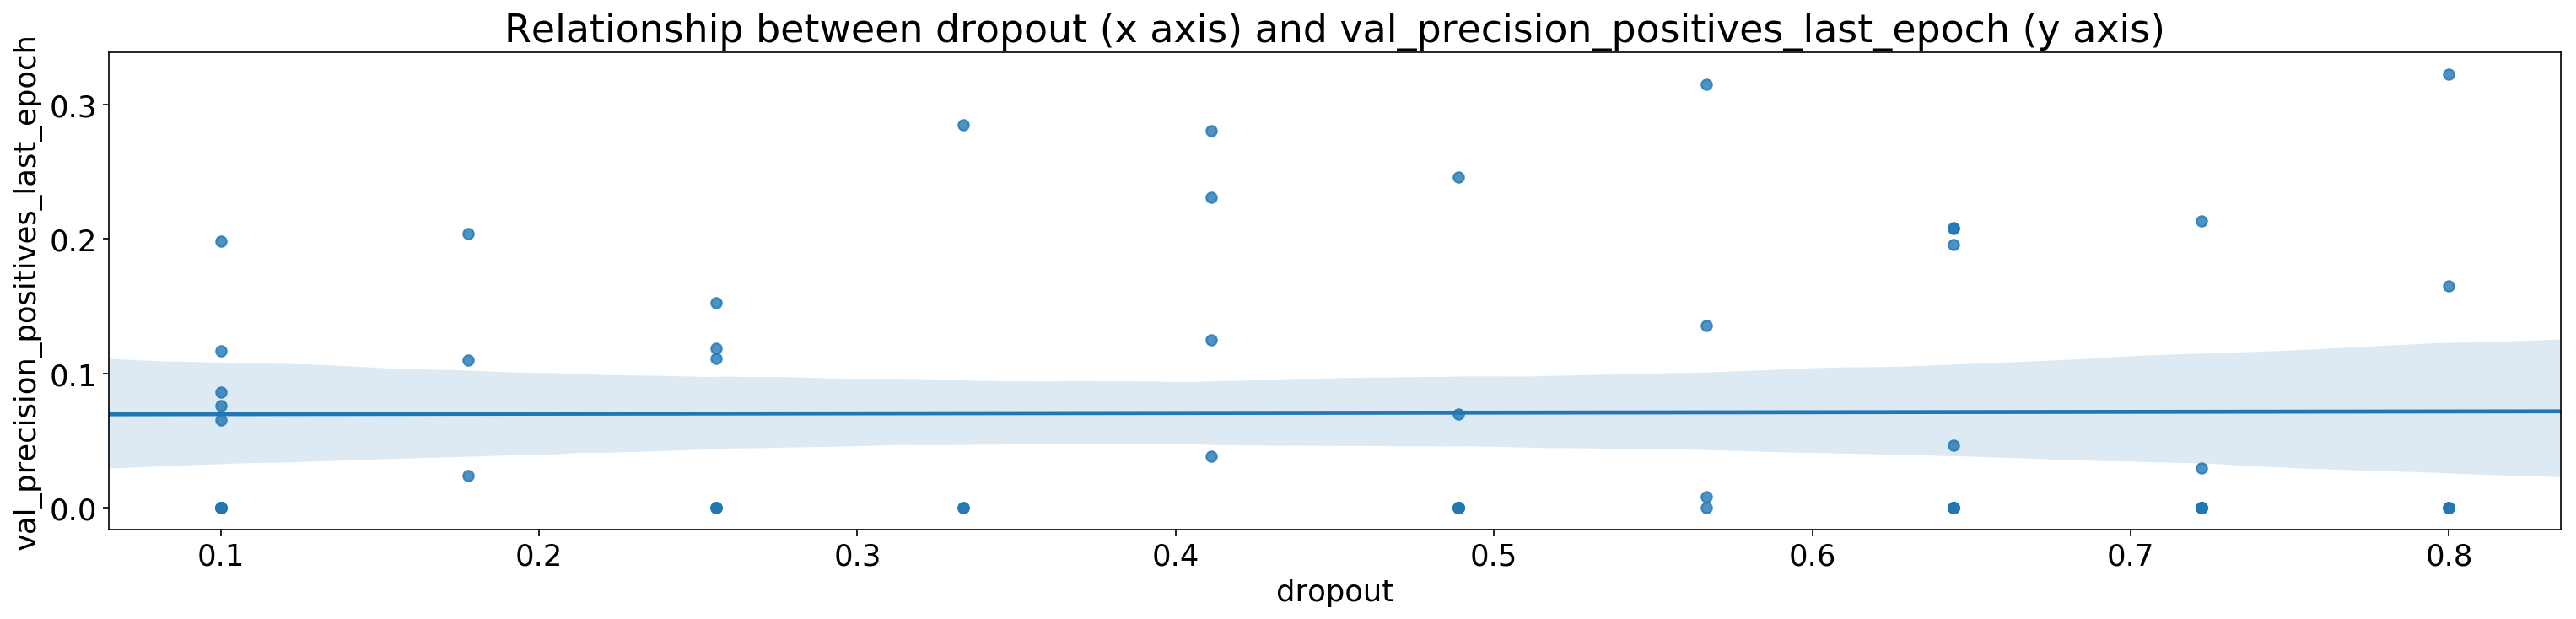

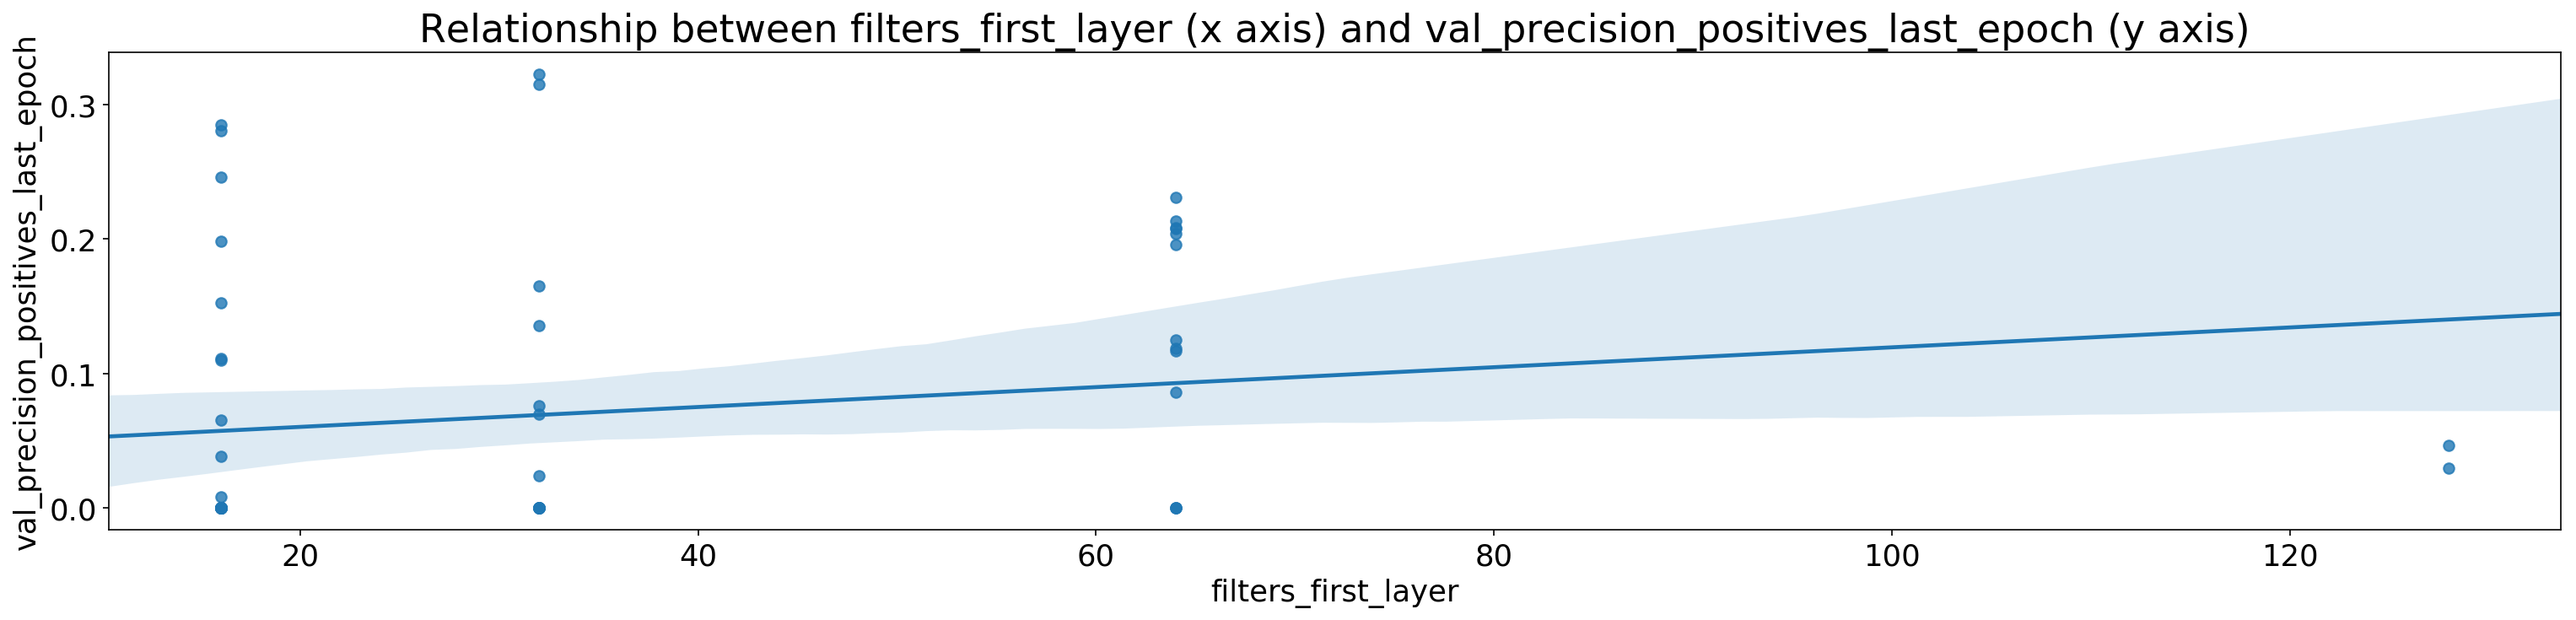

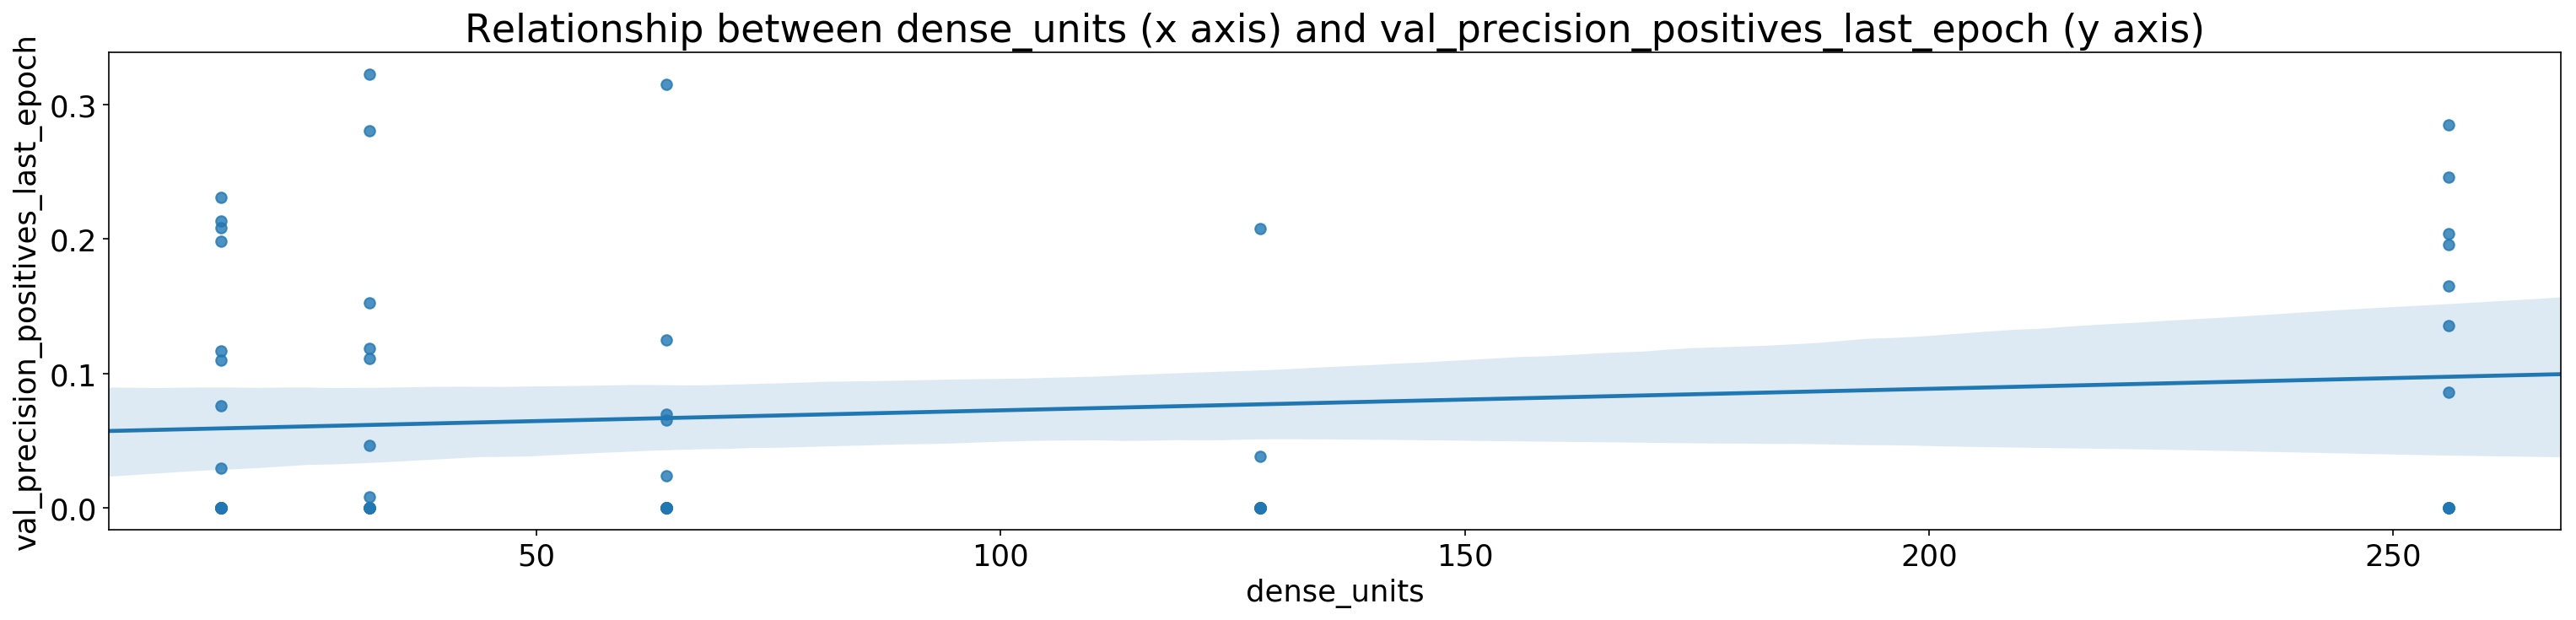

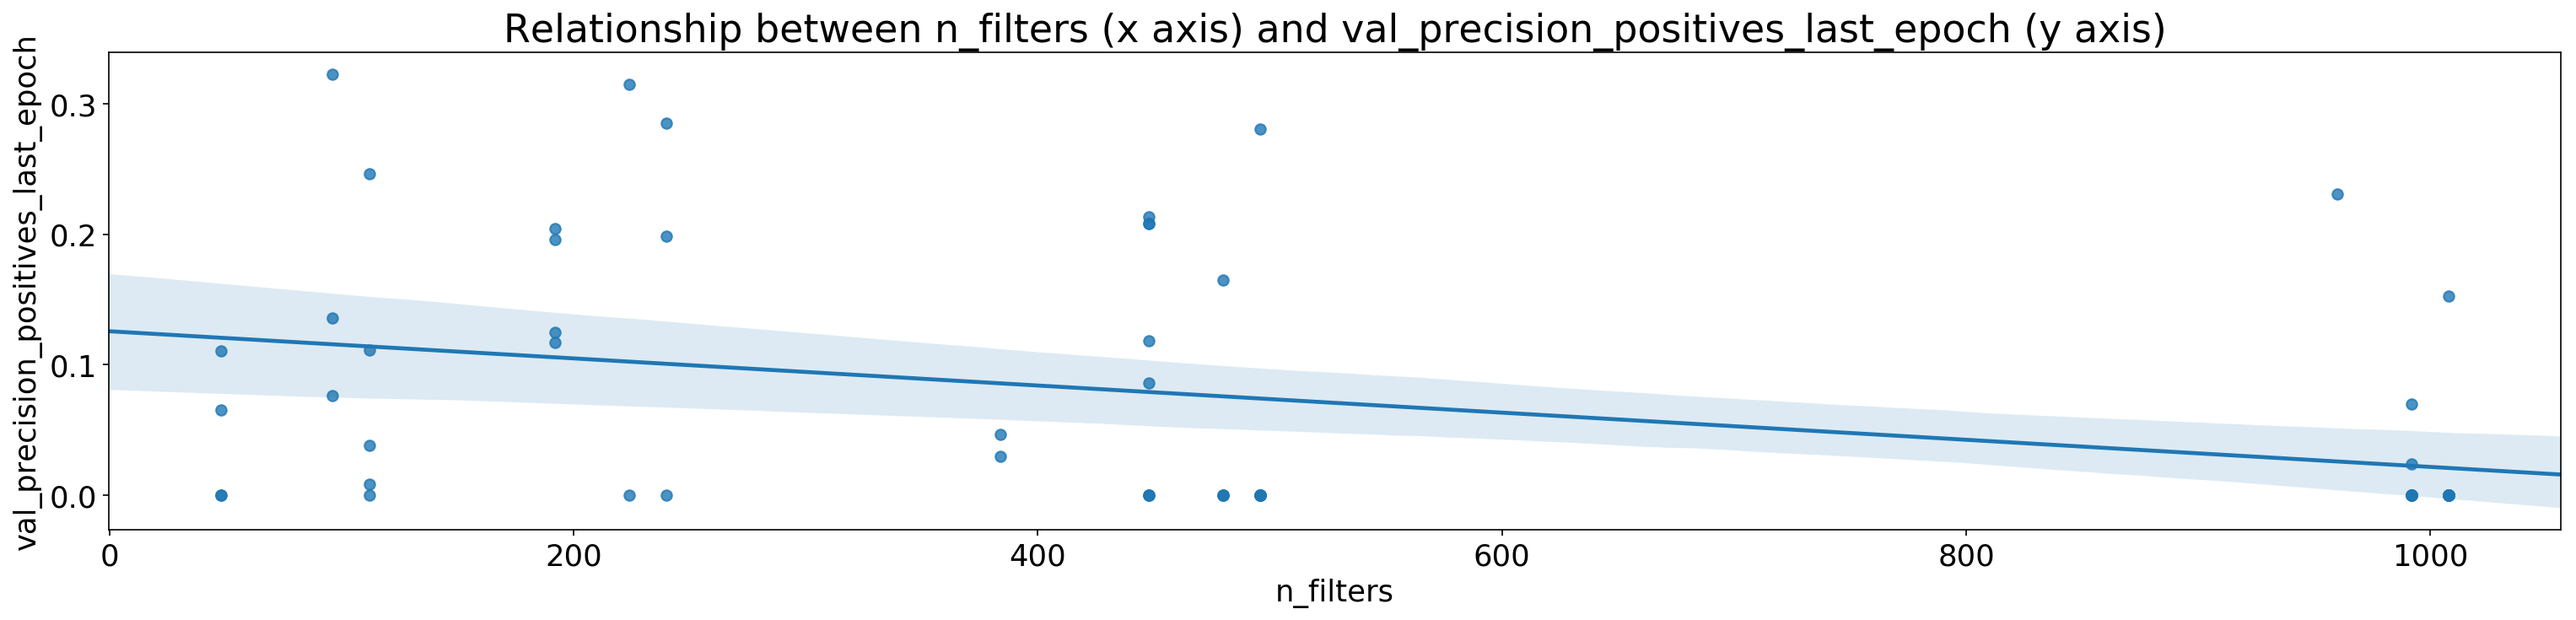

In [20]:
parameters = ['epochs', 'learning_rate', 'batch_size', 'n_layers', 'dropout', 'filters_first_layer', 'dense_units', 'n_filters']
metric = 'val_precision_positives_last_epoch'
for parameter in parameters:
    fig, ax = plt.subplots(figsize=(25, 5))
    _experiments = experiments[[parameter, metric]].dropna()
    sns.regplot(_experiments[parameter], _experiments[metric])
    ax.set_title(f'Relationship between {parameter} (x axis) and {metric} (y axis)')

activation
relu    62
Name: val_precision_positives_last_epoch, dtype: int64


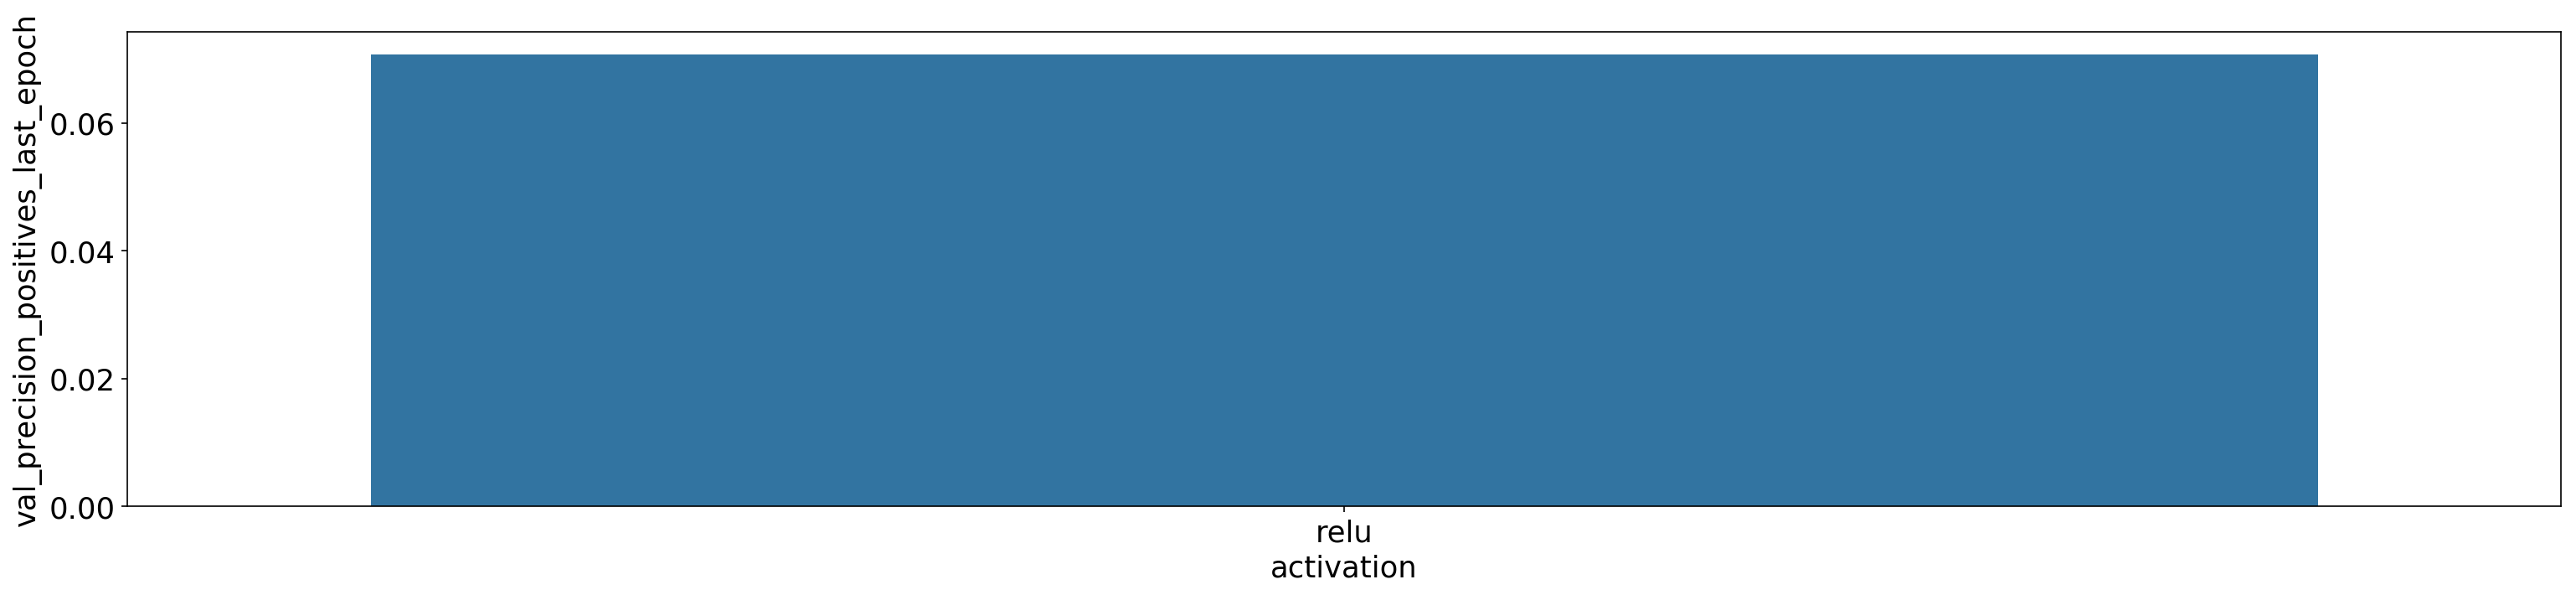

In [19]:
fig, ax = plt.subplots(figsize=(25, 5))
print(experiments.groupby('activation')[metric].count())
sns.barplot(x=experiments.groupby('activation')[metric].mean().index, y=experiments.groupby('activation')[metric].mean(), ax=ax)

Count of experiments per layer type {'cnn': 30, 'vgg': 32}


Text(0.5, 1.0, 'Average performance per layer type')

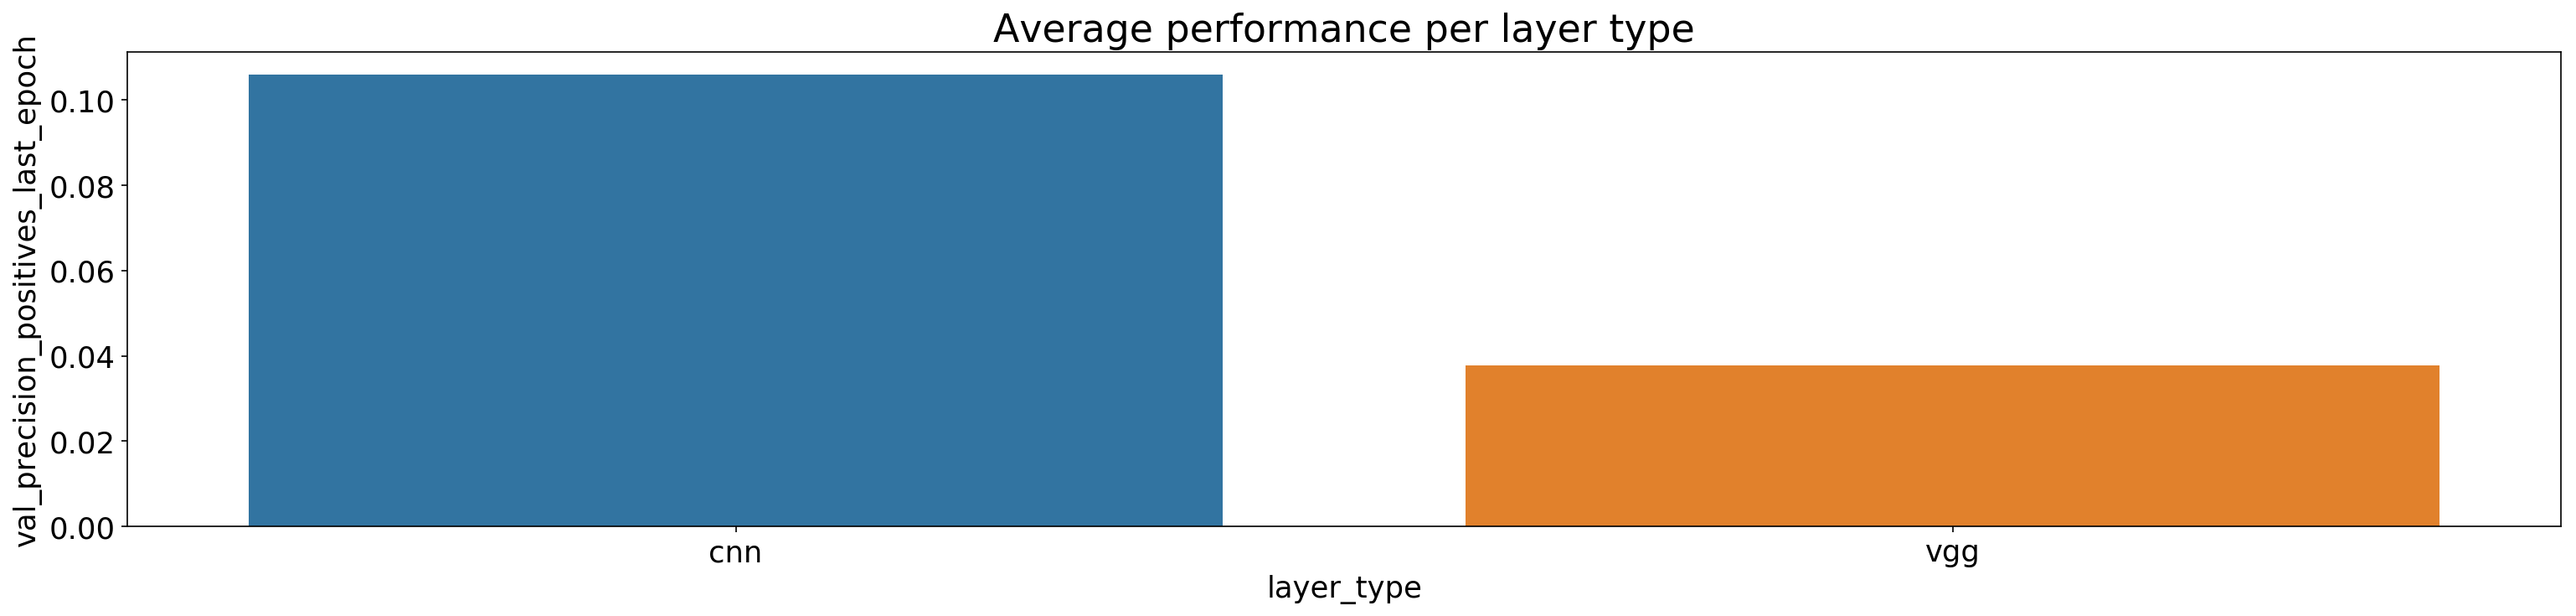

In [18]:
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per layer type', experiments.groupby('layer_type')[metric].count().to_dict())
sns.barplot(x=experiments.groupby('layer_type')[metric].mean().index, y=experiments.groupby('layer_type')[metric].mean(), ax=ax)
ax.set_title('Average performance per layer type')

Count of experiments per layer type {'cnn': 30, 'vgg': 32}


Text(0.5, 1.0, 'Best performance per layer type')

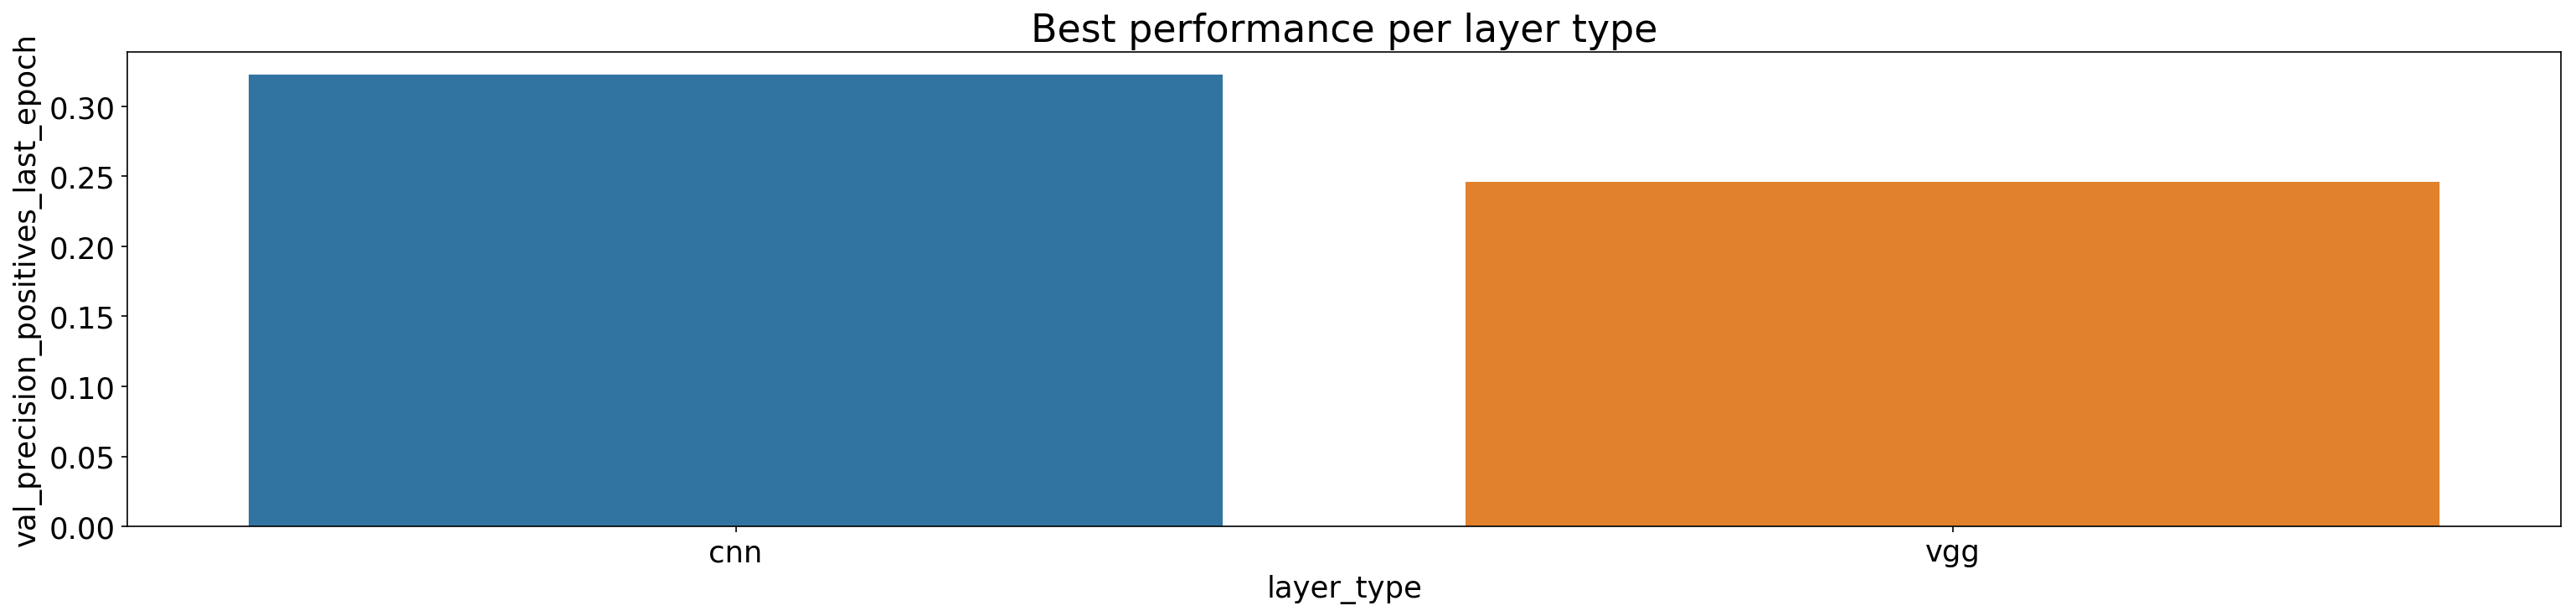

In [17]:
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per layer type', experiments.groupby('layer_type')[metric].count().to_dict())
sns.barplot(x=experiments.groupby('layer_type')[metric].max().index, y=experiments.groupby('layer_type')[metric].max(), ax=ax)
ax.set_title('Best performance per layer type')

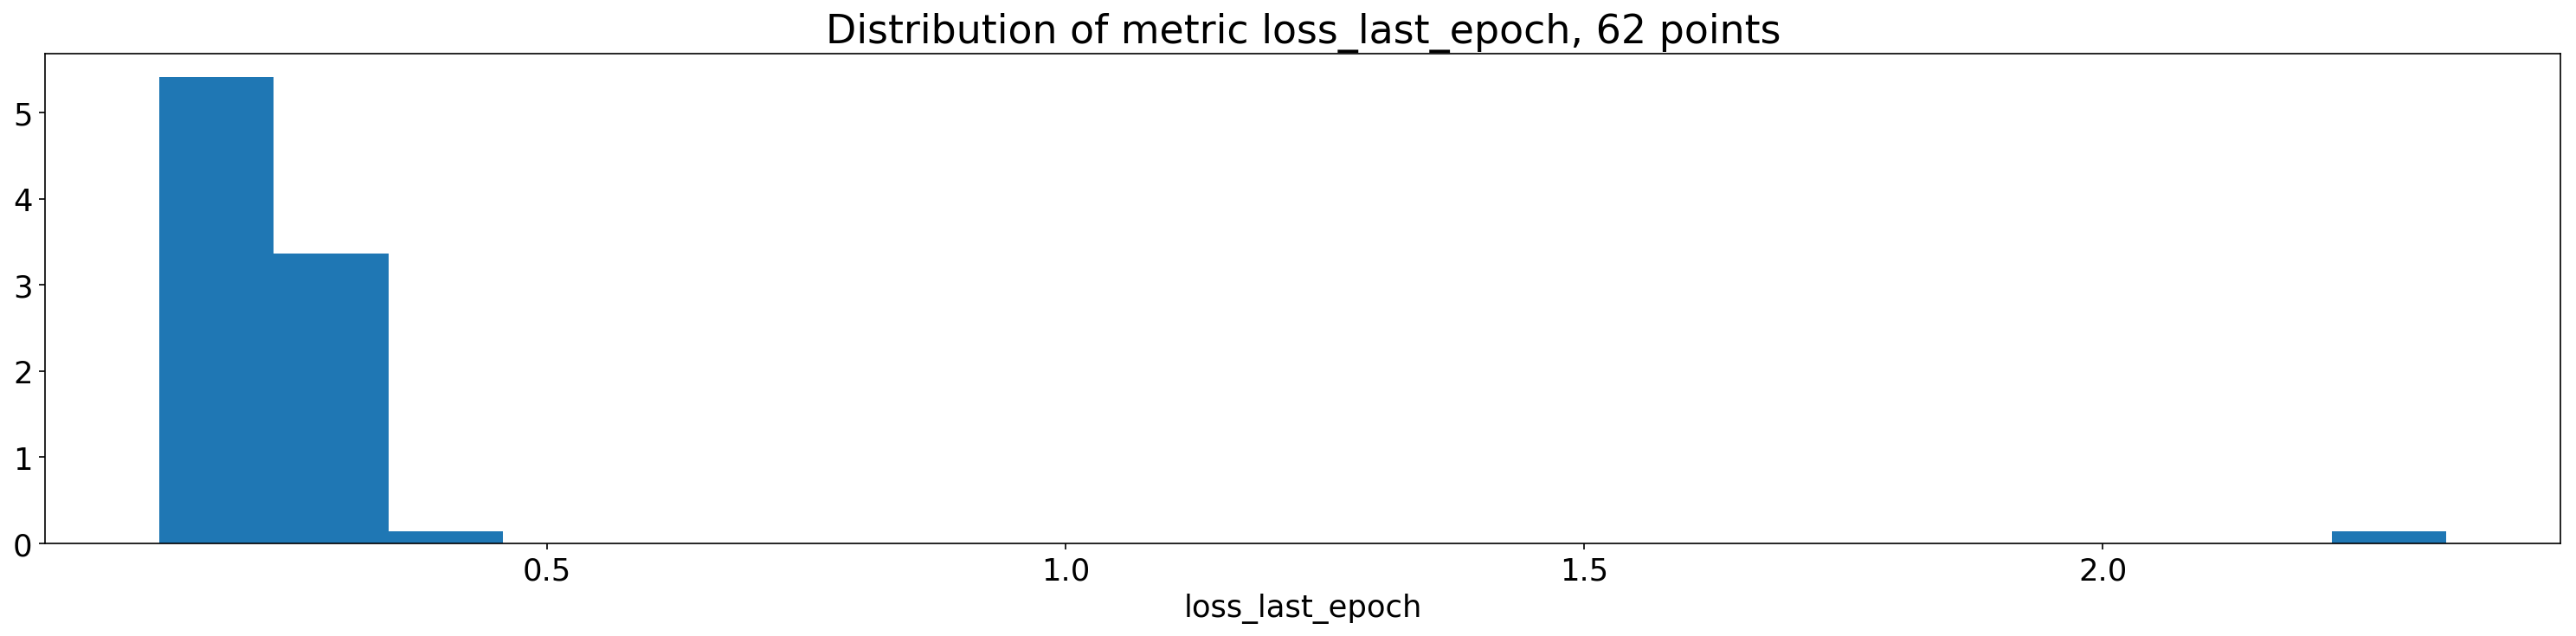

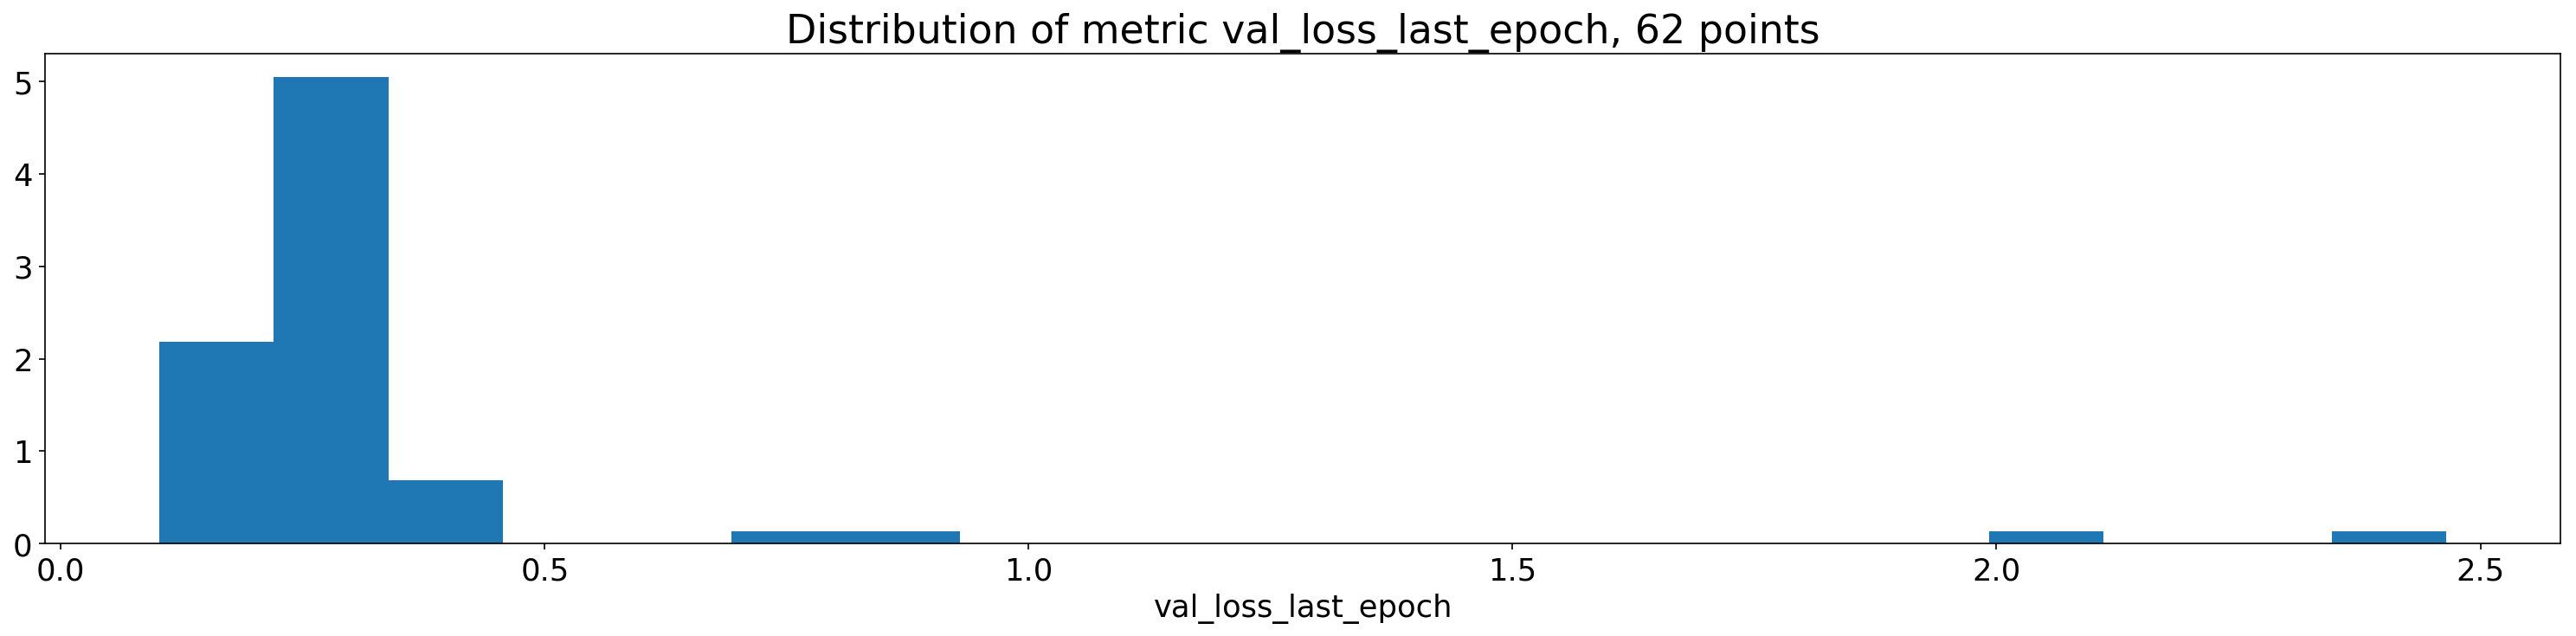

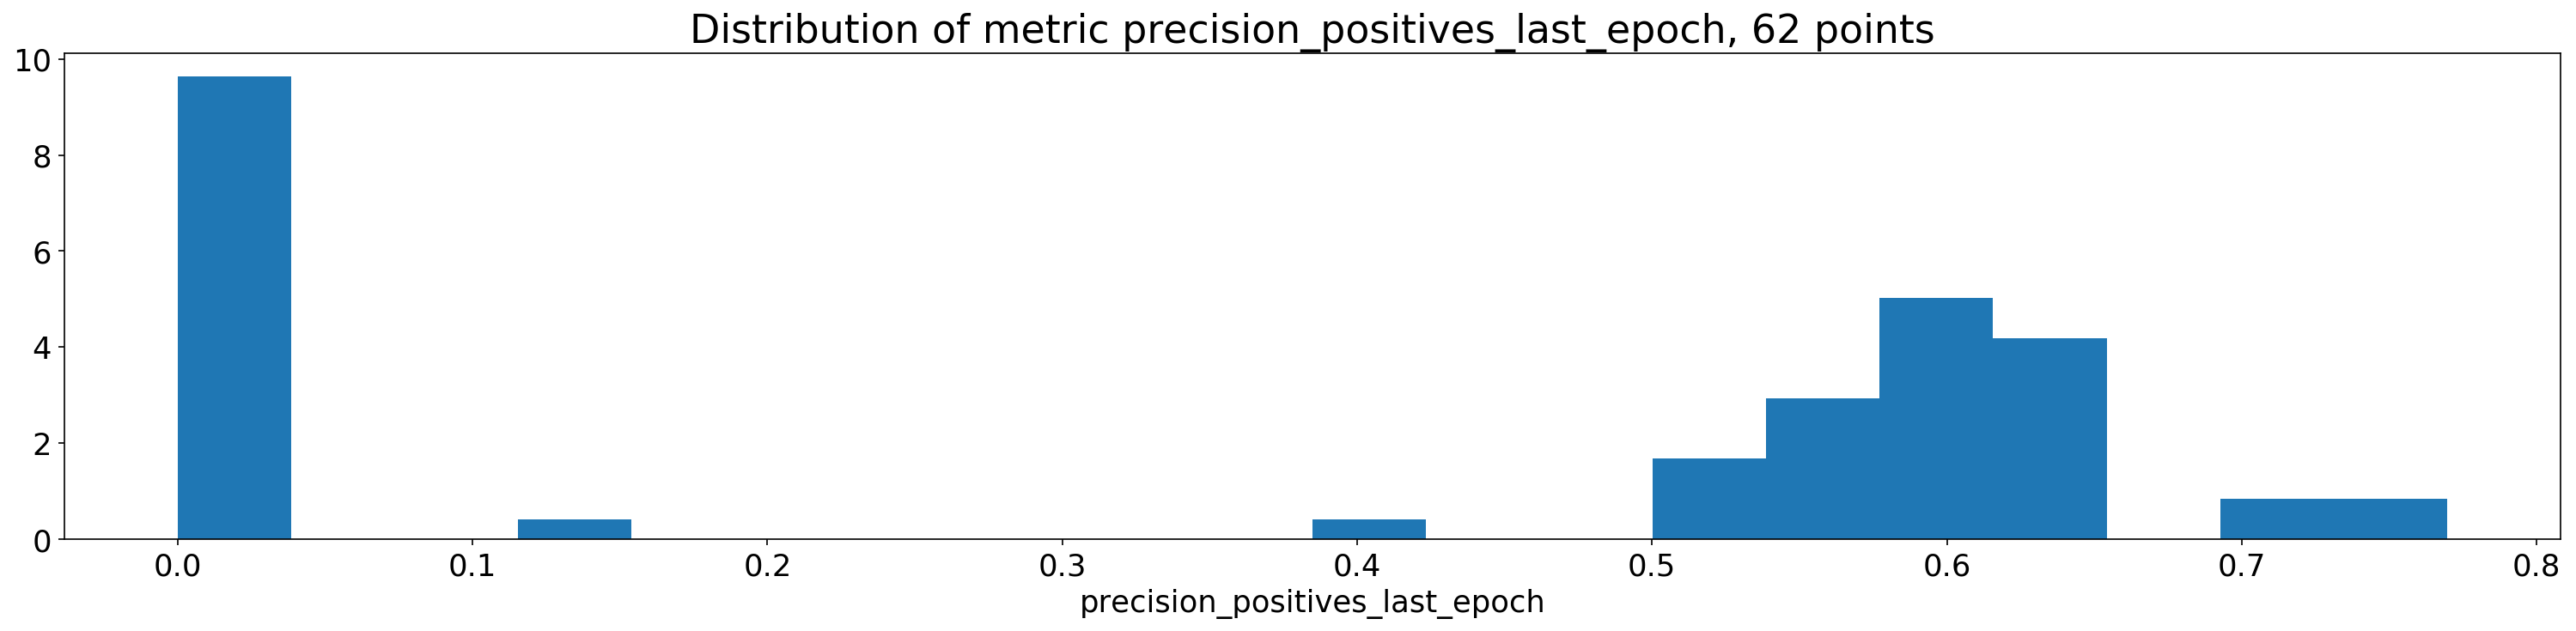

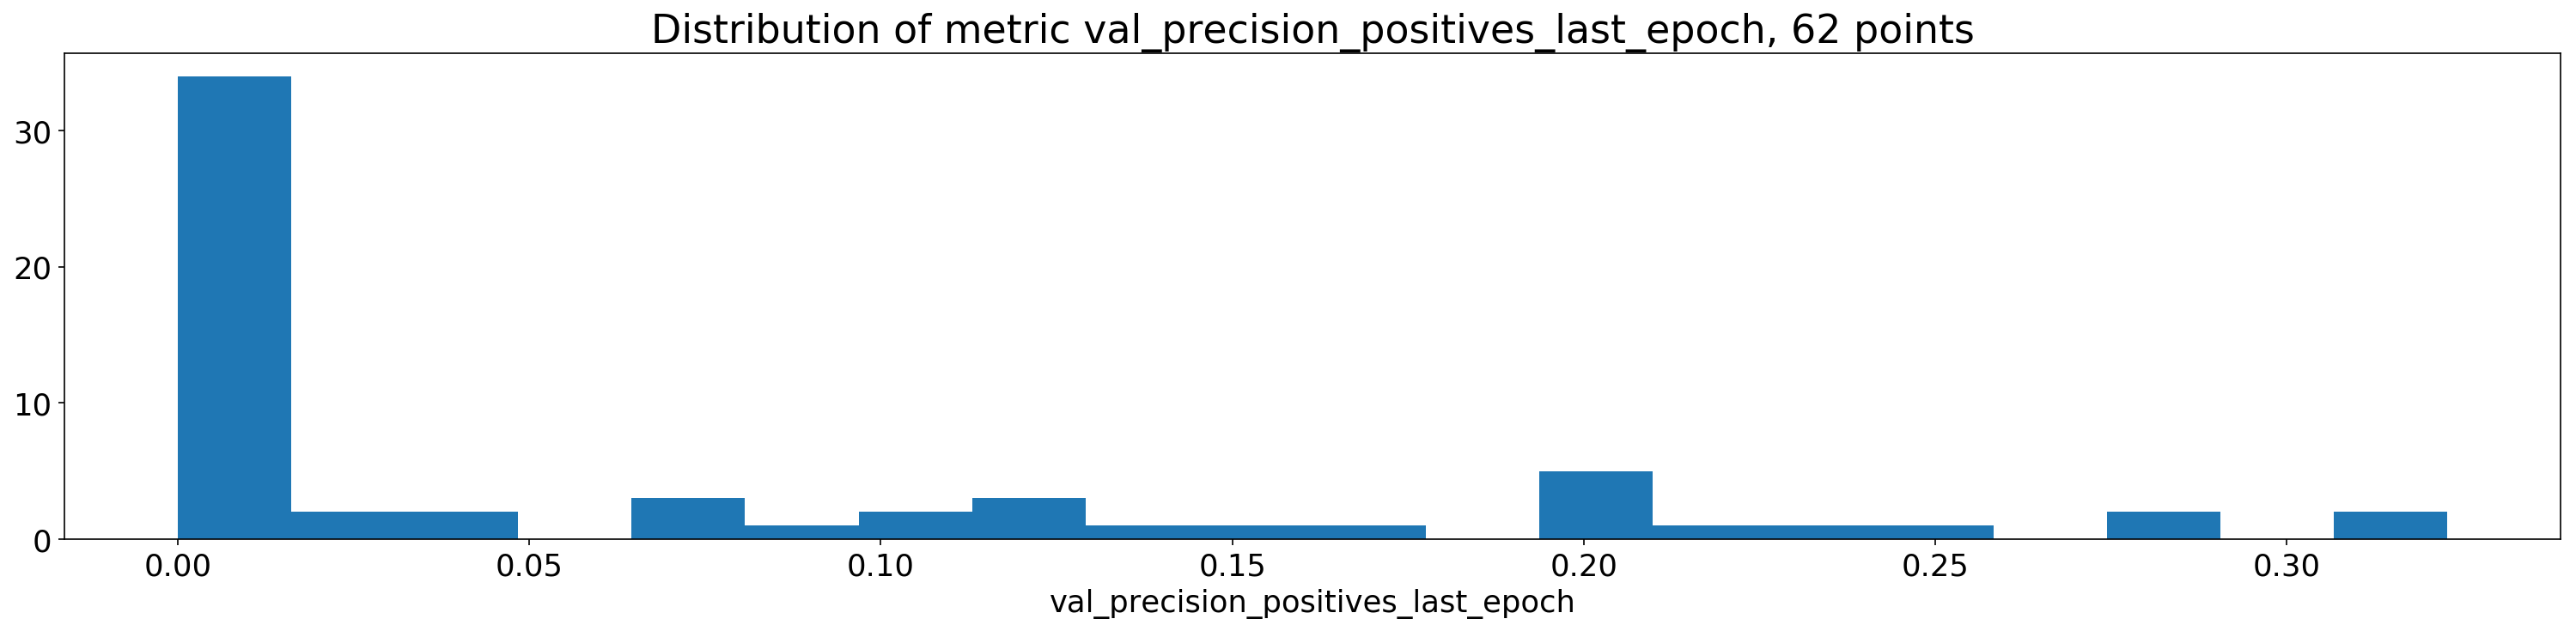

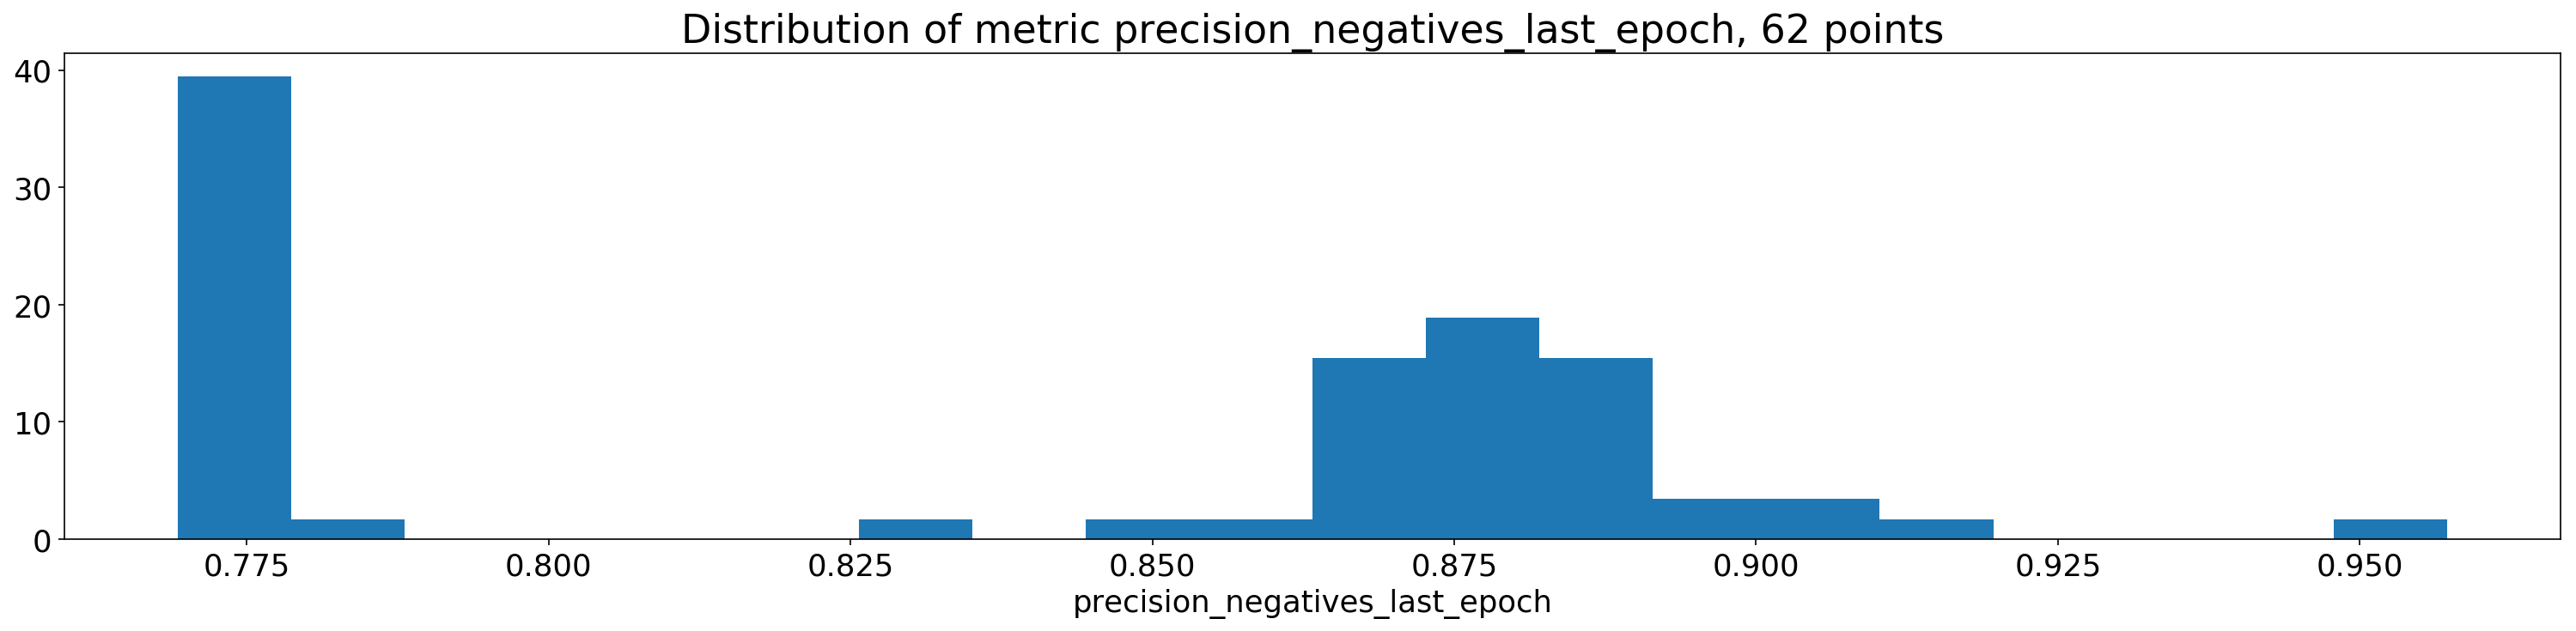

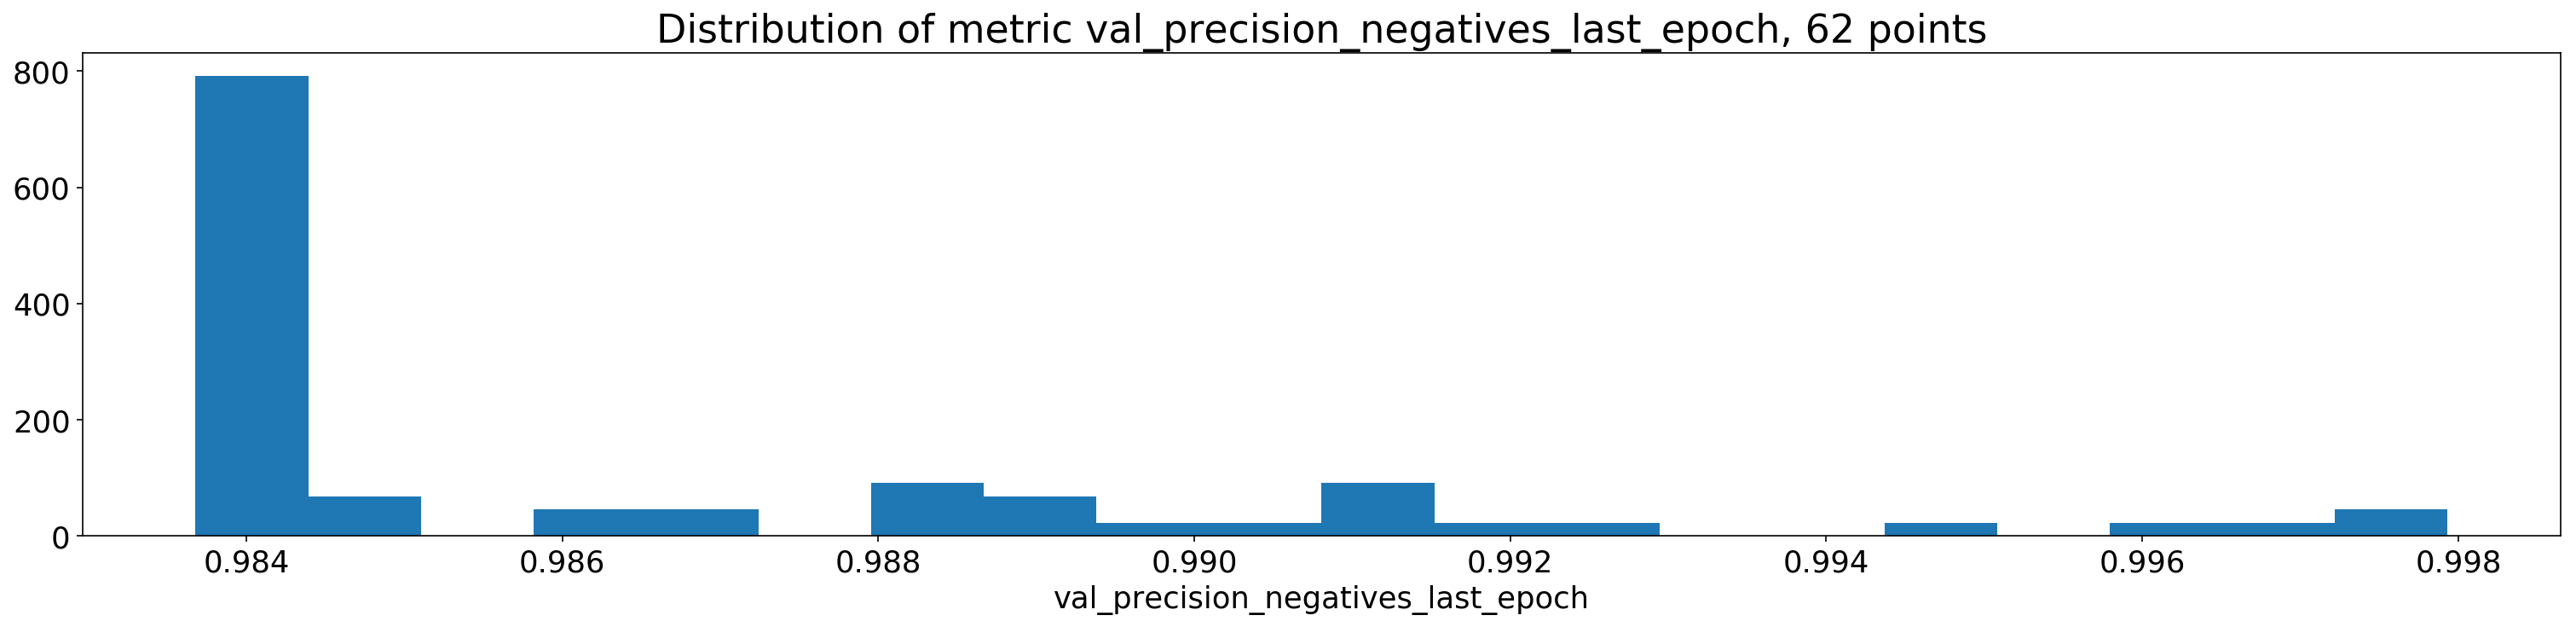

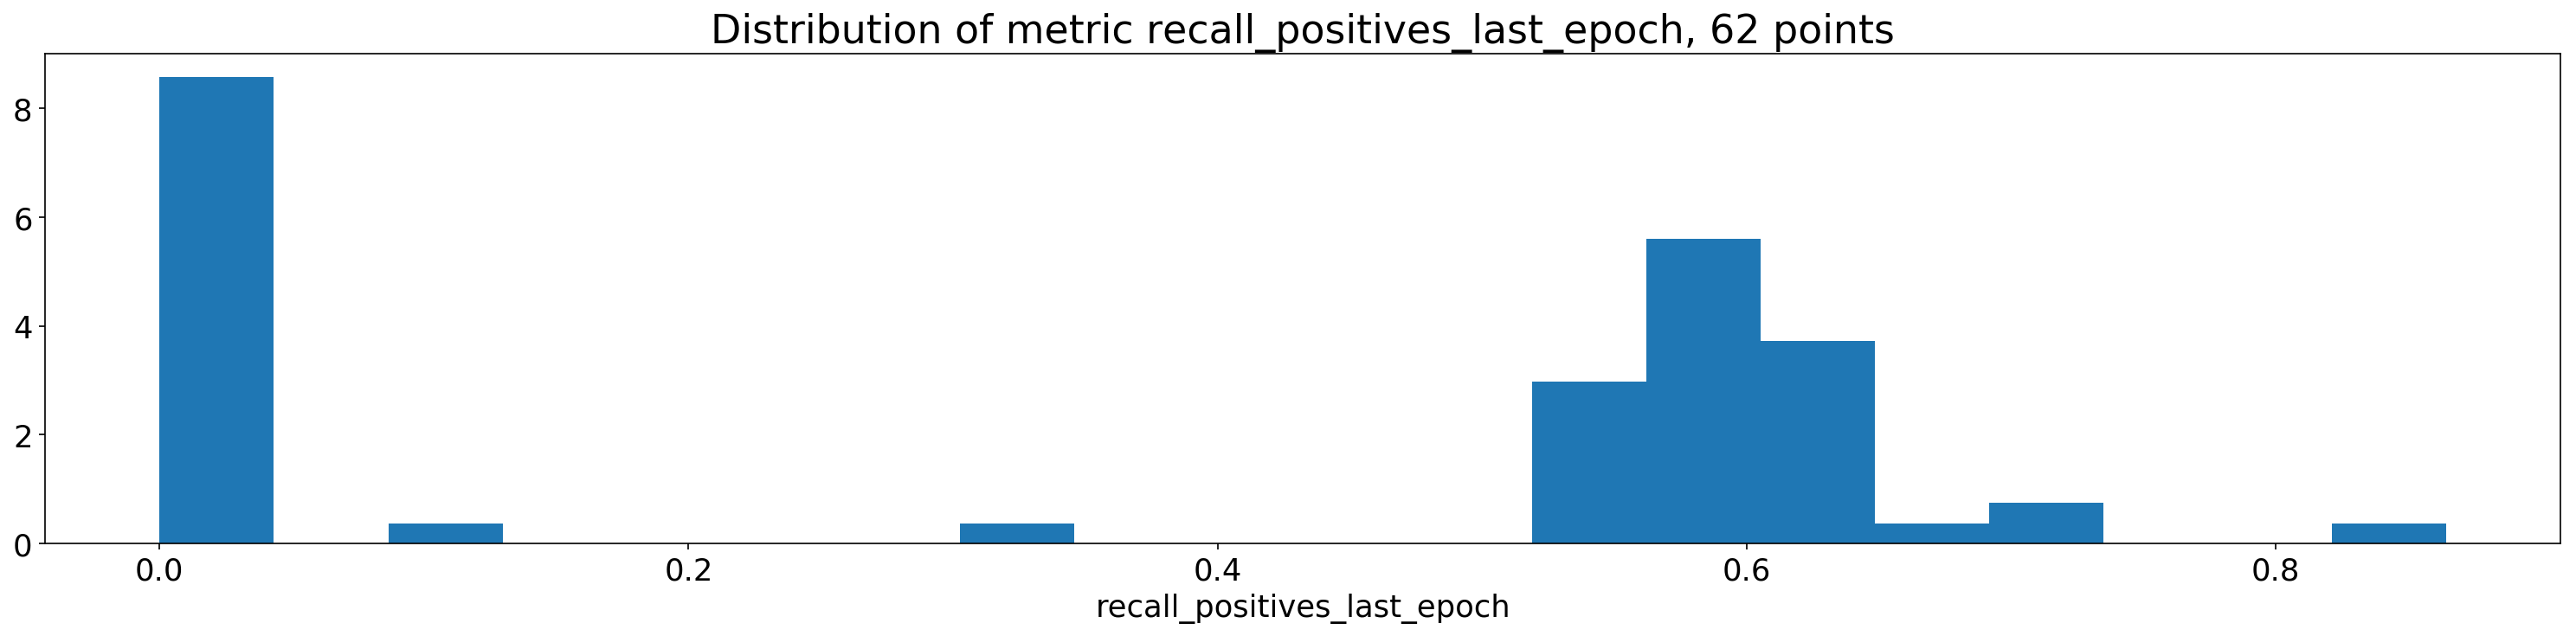

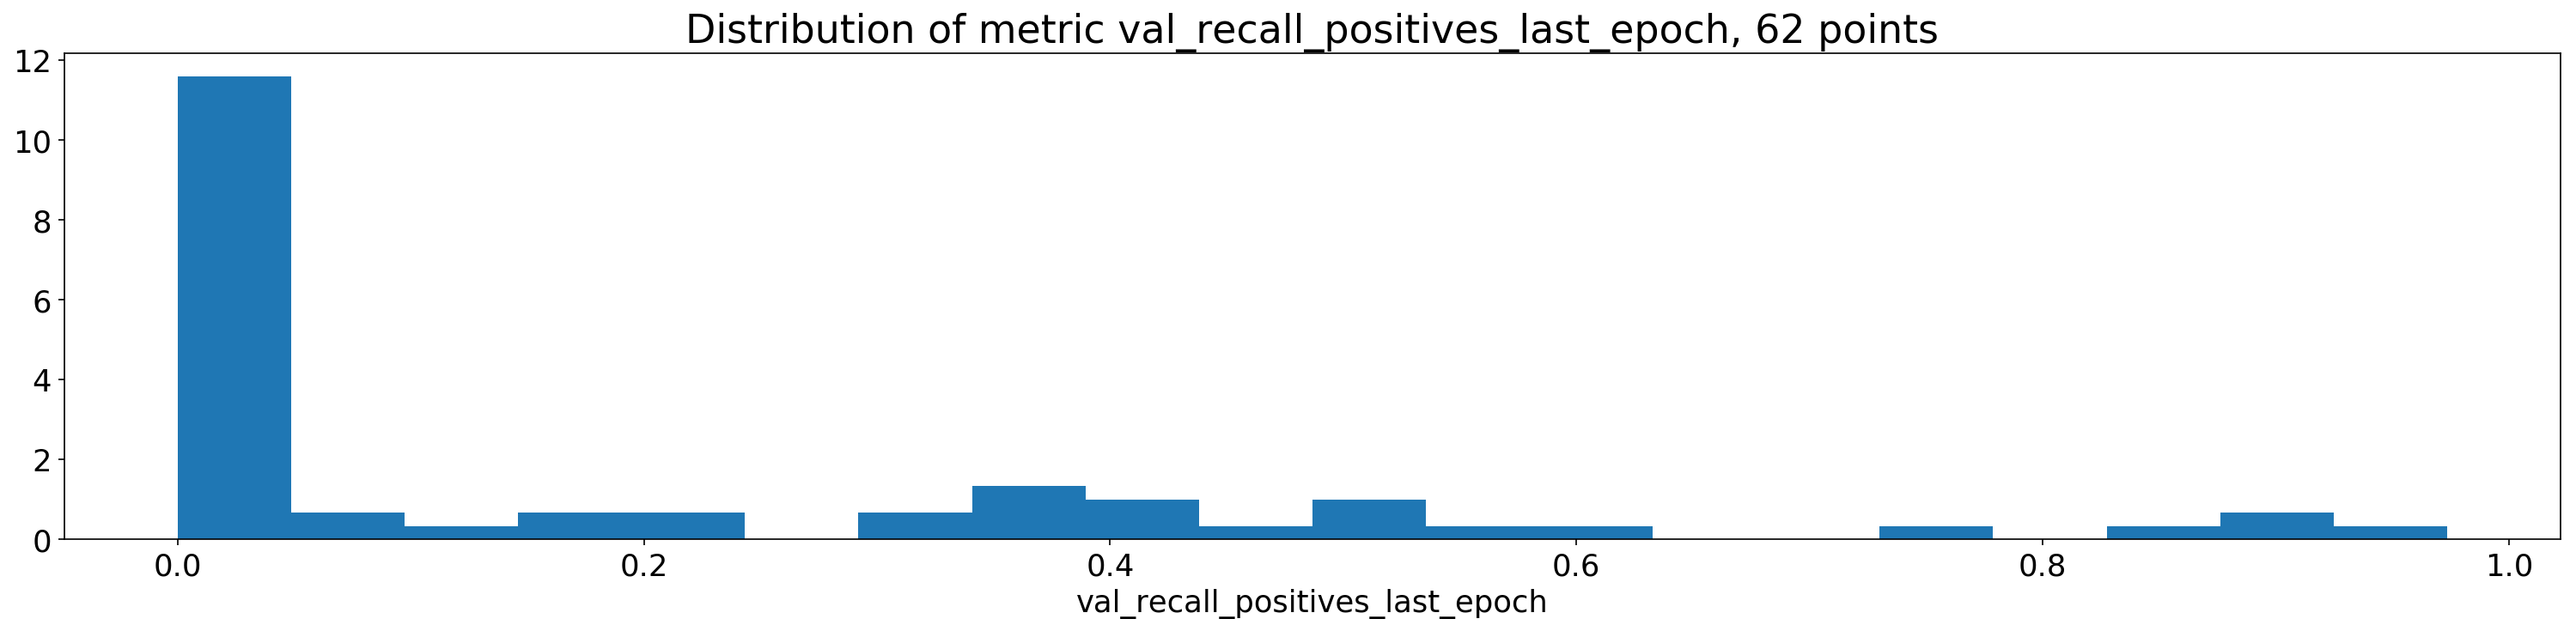

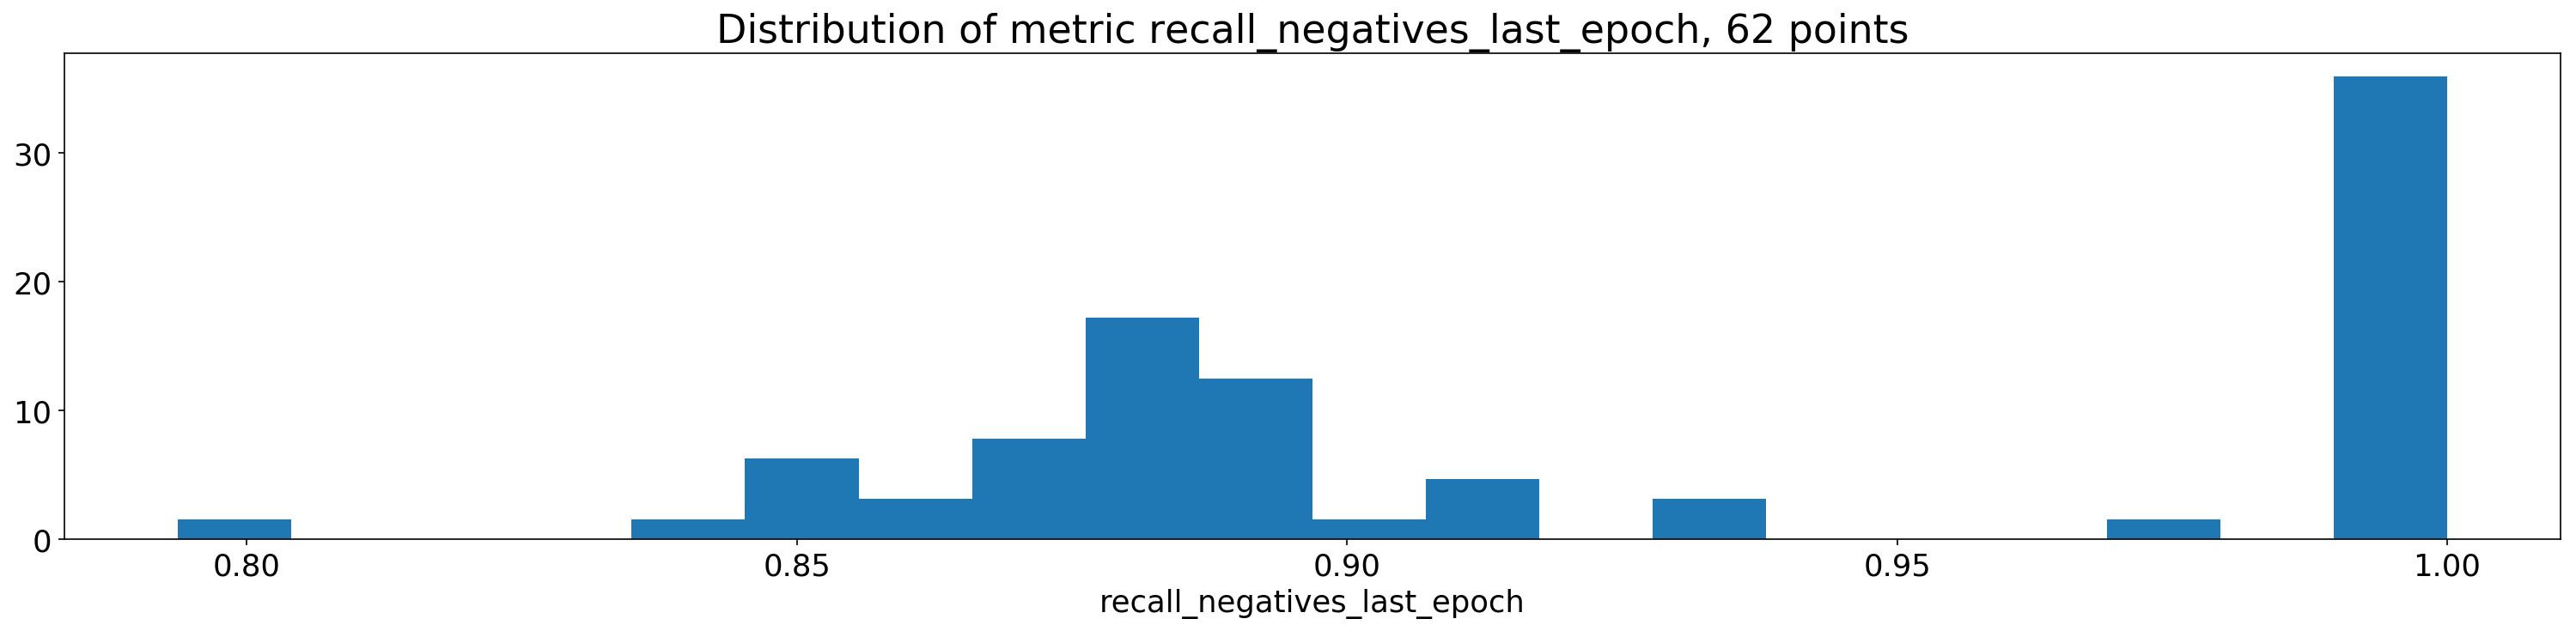

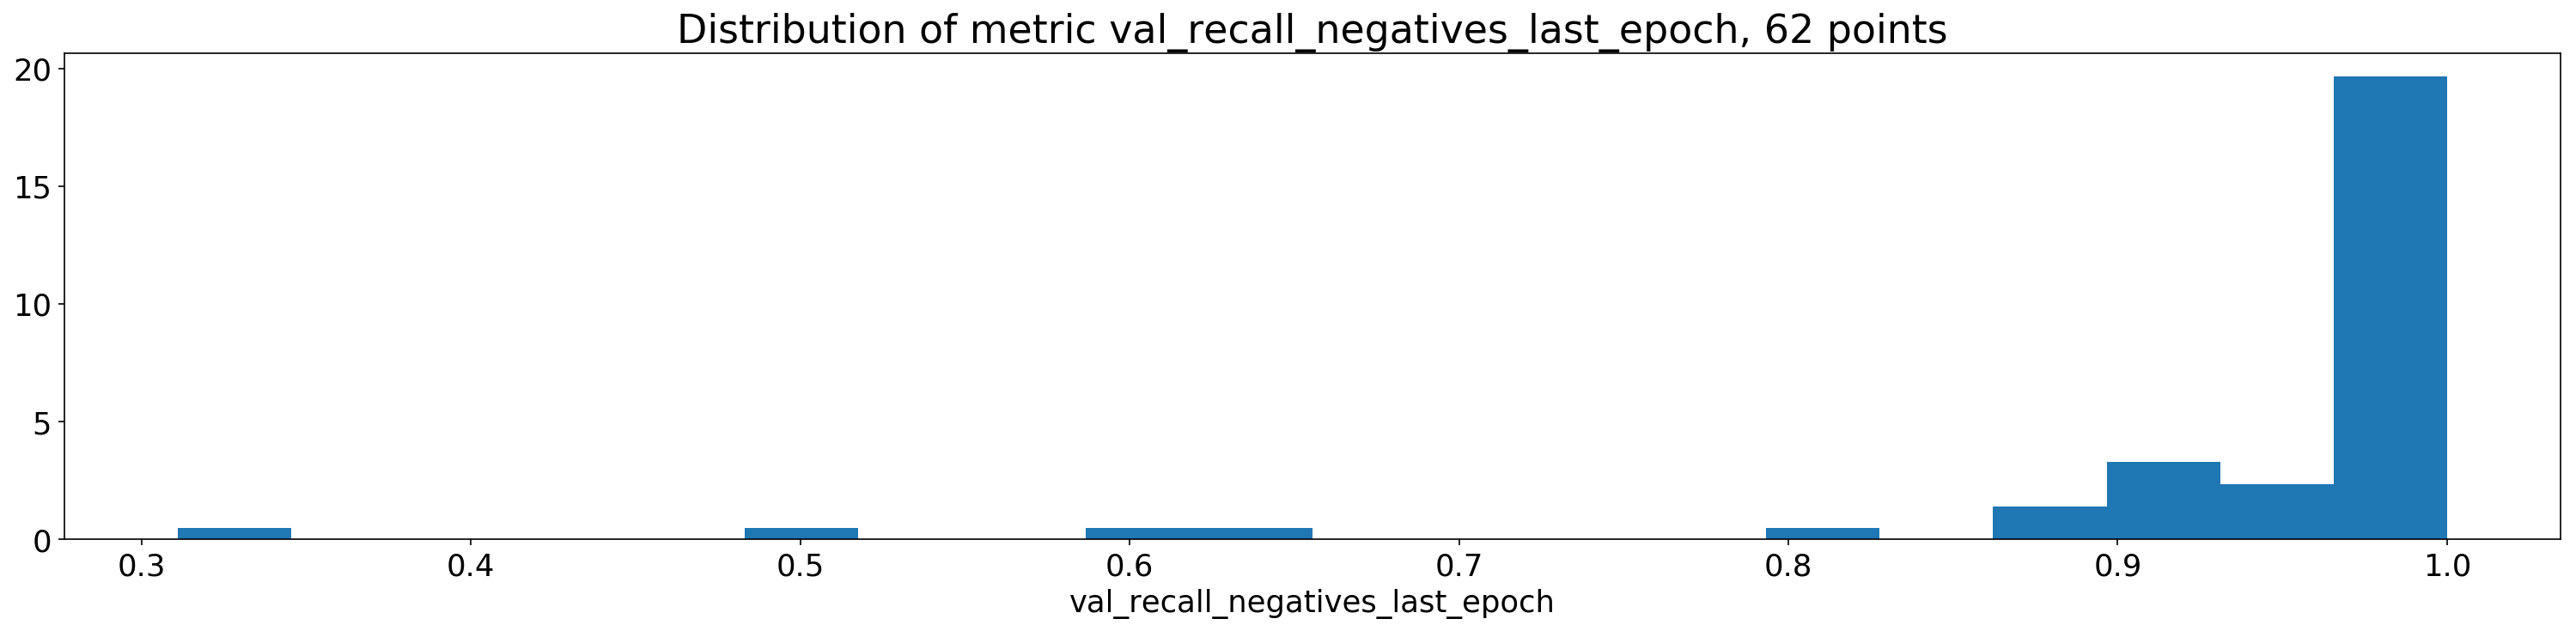

In [21]:
for _metric in metrics:
    fig, ax = plt.subplots(figsize=(25, 5))
    ax.hist(experiments[_metric].dropna(), bins=20, density=True)
    ax.set_xlabel(_metric)
    ax.set_title(f'Distribution of metric {_metric}, {experiments[_metric].dropna().shape[0]} points')

In [29]:
experiments[metrics]

,loss_last_epoch,val_loss_last_epoch,precision_positives_last_epoch,val_precision_positives_last_epoch,precision_negatives_last_epoch,val_precision_negatives_last_epoch,recall_positives_last_epoch,val_recall_positives_last_epoch,recall_negatives_last_epoch,val_recall_negatives_last_epoch
datetime,,,,,,,,,,
2019-06-26 16:35:52,0.272954,0.469919,0.000000,0.000000,0.769399,0.982744,0.000000,0.000000,1.000000,1.000000
2019-06-25 23:09:21,0.208773,0.563941,0.553459,0.072466,0.873470,0.994591,0.572500,0.794728,0.864990,0.723444
2019-06-26 17:51:45,0.208664,0.357462,0.550690,0.116938,0.870138,0.990627,0.554624,0.559351,0.871554,0.855637
2019-06-26 14:22:25,0.163784,0.300110,0.685178,0.143225,0.914606,0.990150,0.716640,0.496377,0.897632,0.907633
2019-06-26 12:40:14,0.272805,0.277290,0.000000,0.000000,0.769304,0.982024,0.000000,0.000000,1.000000,1.000000
2019-06-26 01:24:49,0.233909,0.343161,0.513681,0.113778,0.849952,0.989829,0.577831,0.493918,0.781372,0.881374
2019-06-26 03:30:29,0.208895,0.173664,0.566641,0.292217,0.872801,0.986324,0.568570,0.237146,0.870116,0.975133
2019-06-26 10:45:55,0.272963,0.421271,0.000000,0.000000,0.769307,0.982674,0.000000,0.000000,1.000000,1.000000
2019-06-26 09:43:05,0.272925,0.426824,0.000000,0.000000,0.769307,0.982674,0.000000,0.000000,1.000000,1.000000


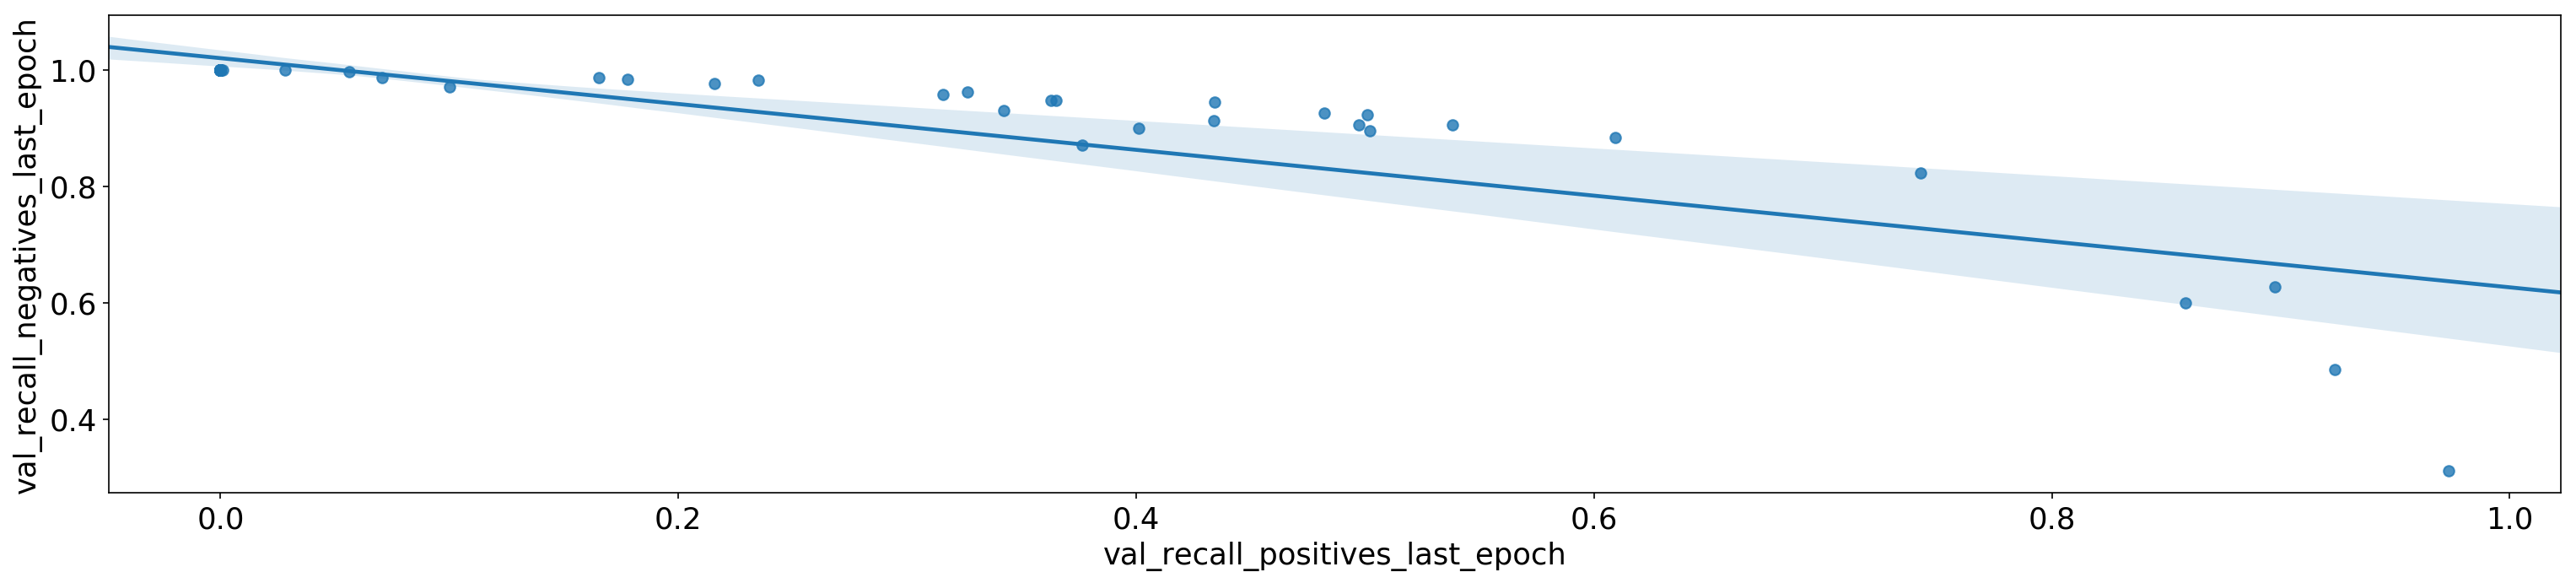

In [22]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.regplot(experiments['val_recall_positives_last_epoch'], experiments['val_recall_negatives_last_epoch'])

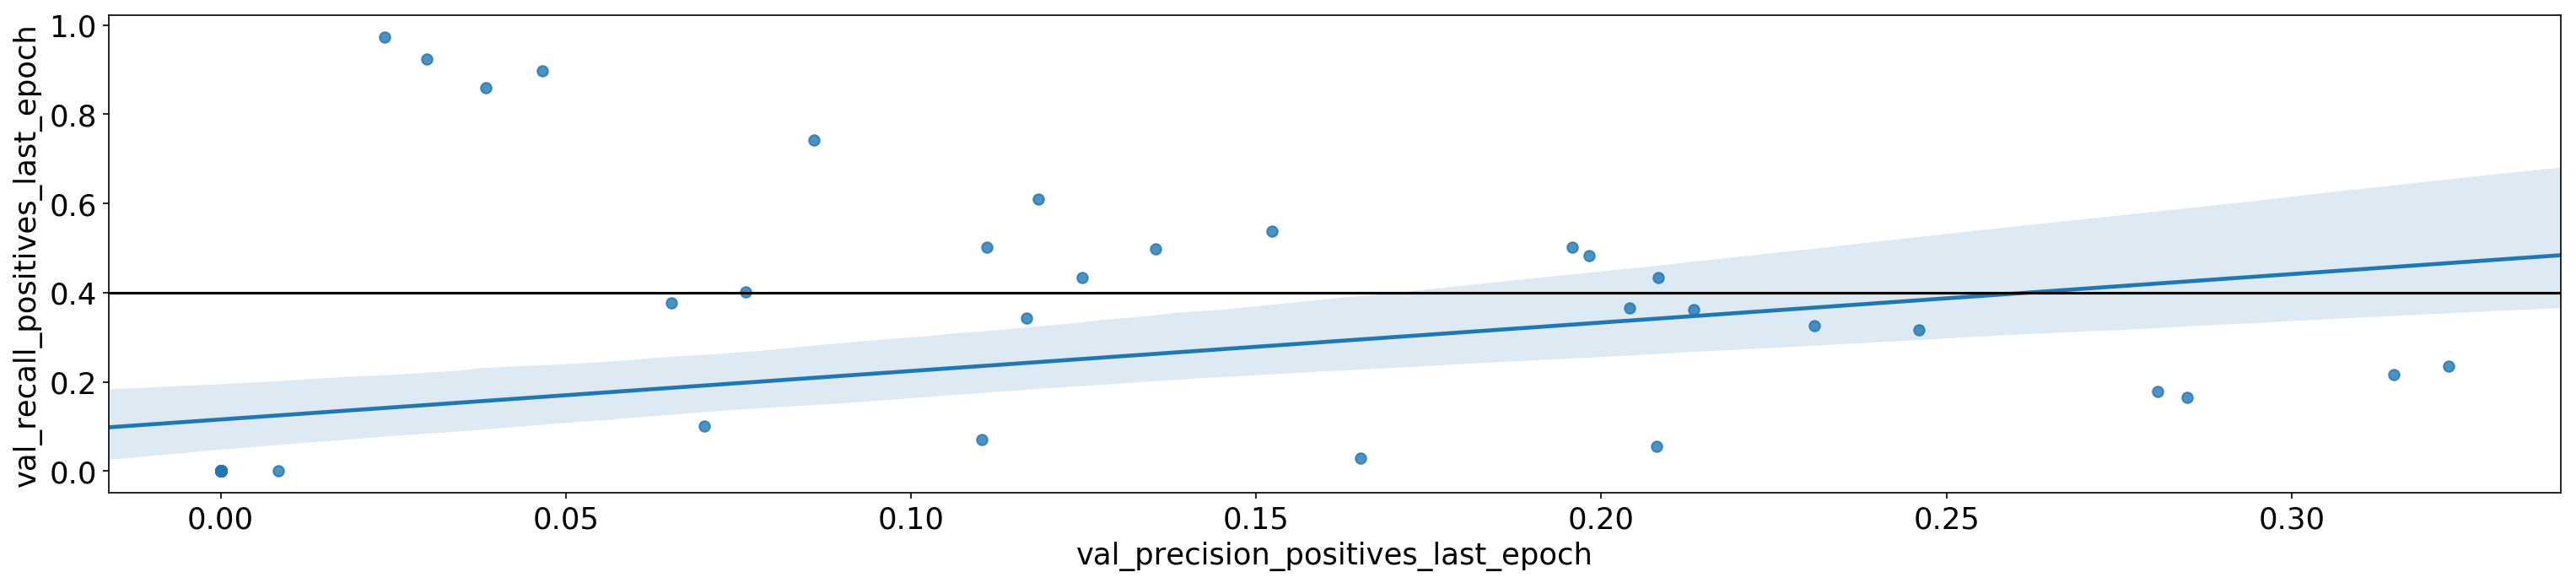

In [27]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.regplot(experiments['val_precision_positives_last_epoch'], experiments['val_recall_positives_last_epoch'])
ax.axhline(0.4, color='black')

In [20]:
experiments[metrics].to_csv('../figures/experiments.csv')

In [19]:
experiments[metrics]

,loss_last_epoch,val_loss_last_epoch,precision_positives_last_epoch,val_precision_positives_last_epoch,precision_negatives_last_epoch,val_precision_negatives_last_epoch,recall_positives_last_epoch,val_recall_positives_last_epoch,recall_negatives_last_epoch,val_recall_negatives_last_epoch
datetime,,,,,,,,,,
2019-06-26 16:35:52,0.272954,0.469919,0.000000,0.000000,0.769399,0.982744,0.000000,0.000000,1.000000,1.000000
2019-06-30 03:15:10,2.257556,0.314401,0.232408,0.000000,0.769830,0.982011,0.273402,0.000000,0.728710,1.000000
2019-06-25 23:09:21,0.208773,0.563941,0.553459,0.072466,0.873470,0.994591,0.572500,0.794728,0.864990,0.723444
2019-06-26 17:51:45,0.208664,0.357462,0.550690,0.116938,0.870138,0.990627,0.554624,0.559351,0.871554,0.855637
2019-06-29 22:56:57,0.273032,0.453662,0.000000,0.000000,0.769445,0.982011,0.000000,0.000000,1.000000,1.000000
2019-07-02 23:03:29,0.184120,0.318268,0.643418,0.164245,0.897500,0.992219,0.656937,0.585835,0.886848,0.905042
2019-06-29 20:45:13,0.218727,0.335042,0.514467,0.124466,0.864839,0.989939,0.556352,0.532263,0.841819,0.869678
2019-06-30 10:12:14,0.273088,0.332443,0.000094,0.000000,0.769446,0.982011,0.000009,0.000000,1.000000,1.000000
2019-06-27 02:34:51,0.272908,0.460317,0.000000,0.000000,0.769399,0.982744,0.000000,0.000000,1.000000,1.000000
